In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\assignment3\Final Data Set.csv')

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 84 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   ID No.                                                                                                                                           73 non-null     int64  
 1   Program of Study                                                                                                                                 73 non-null     object 
 2   Gender                                                                                                                                           73 non-null     object 
 3   Nationality           

In [4]:
# Summary statistics of numerical columns
df.describe()


ID No.  Matric percentage  Intermediate percentage  \
count  73.000000          73.000000                73.000000   
mean   37.000000          83.744247                74.393014   
std    21.217131           6.075923                 5.550296   
min     1.000000          61.430000                59.090000   
25%    19.000000          81.620000                71.360000   
50%    37.000000          84.360000                74.450000   
75%    55.000000          87.730000                77.360000   
max    73.000000          96.270000                87.450000   

       SGPA in BS First semester  SGPA in BS Second semester  \
count                  71.000000                   73.000000   
mean                    3.005775                    2.668904   
std                     0.468245                    0.576967   
min                     1.230000                    1.260000   
25%                     2.690000                    2.280000   
50%                     3.170000                    2.630000   
75%                     3.330000                    3.060000   
max                     3.810000                    3.770000   

       SGPA in BS Third semester  SGPA in BS Fourth semester  \
count                  73.000000                   73.000000   
mean                    2.823014                    2.680274   
std                     0.495686                    0.523378   
min                     1.690000                    1.460000   
25%                     2.490000                    2.260000   
50%                     2.810000                    2.630000   
75%                     3.200000                    3.060000   
max                     3.880000                    3.890000   

       SGPA in BS Fifth semester  CGPA in BS Fifth semester  Unnamed: 76  \
count                  73.000000                  72.000000          0.0   
mean                    2.825753                   2.792361          NaN   
std                     0.499614                   0.424219          NaN   
min                     1.810000                   2.030000          NaN   
25%                     2.480000                   2.477500          NaN   
50%                     2.760000                   2.730000          NaN   
75%                     3.190000                   3.062500          NaN   
max                     4.000000                   3.730000          NaN   

       Unnamed: 77  Unnamed: 78  Unnamed: 79  Unnamed: 80  Unnamed: 81  \
count          0.0          0.0          0.0          0.0          0.0   
mean           NaN          NaN          NaN          NaN          NaN   
std            NaN          NaN          NaN          NaN          NaN   
min            NaN          NaN          NaN          NaN          NaN   
25%            NaN          NaN          NaN          NaN          NaN   
50%            NaN          NaN          NaN          NaN          NaN   
75%            NaN          NaN          NaN          NaN          NaN   
max            NaN          NaN          NaN          NaN          NaN   

       Unnamed: 82  Unnamed: 83  
count          0.0          0.0  
mean           NaN          NaN  
std            NaN          NaN  
min            NaN          NaN  
25%            NaN          NaN  
50%            NaN          NaN  
75%            NaN          NaN  
max            NaN          NaN

In [5]:
# Check for missing values
df.isnull().sum()


ID No.               0
Program of Study     0
Gender               0
Nationality          0
Place of Birth       0
                    ..
Unnamed: 79         73
Unnamed: 80         73
Unnamed: 81         73
Unnamed: 82         73
Unnamed: 83         73
Length: 84, dtype: int64

In [6]:
df = df.drop(df.columns[df.columns.str.startswith('Unnamed')], axis=1)

In [7]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 76 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   ID No.                                                                                                                                           73 non-null     int64  
 1   Program of Study                                                                                                                                 73 non-null     object 
 2   Gender                                                                                                                                           73 non-null     object 
 3   Nationality           

In [8]:
# Check for missing values
df.isnull().sum()

ID No.                                                                                    0
Program of Study                                                                          0
Gender                                                                                    0
Nationality                                                                               0
Place of Birth                                                                            0
                                                                                         ..
I often come across health issues that effect my academic performance.                    0
My preferable mode of study is:                                                           0
My preferable time of study is:                                                           0
My overall mobile usage (daily) for non-academic purpose is limited to:                   0
Identify any other variable that has negatively impacted on your academic perfor

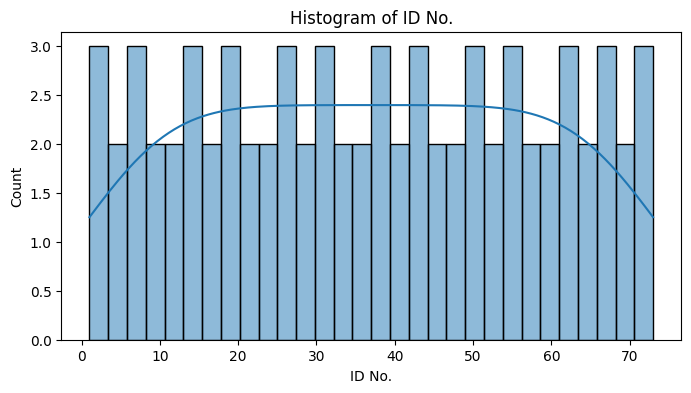

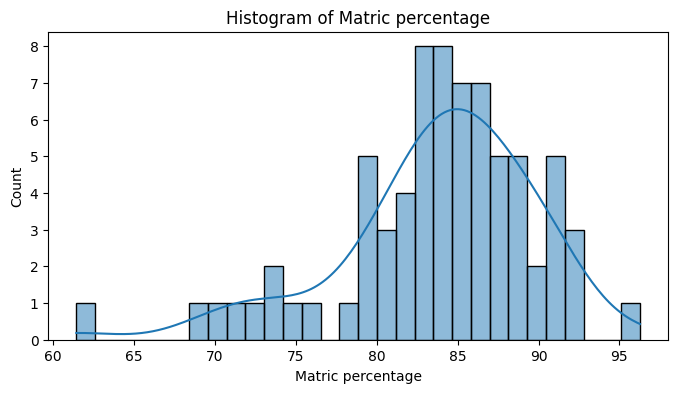

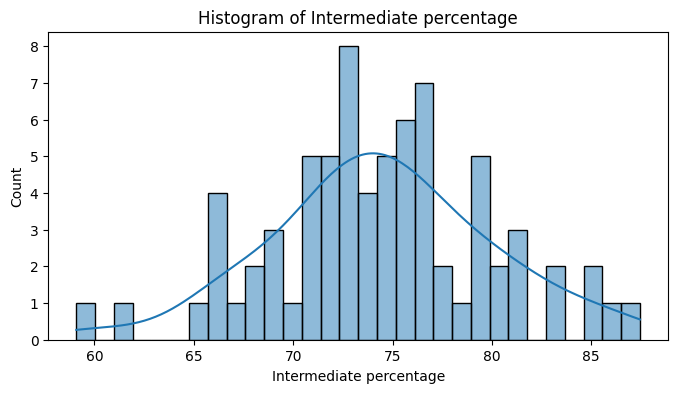

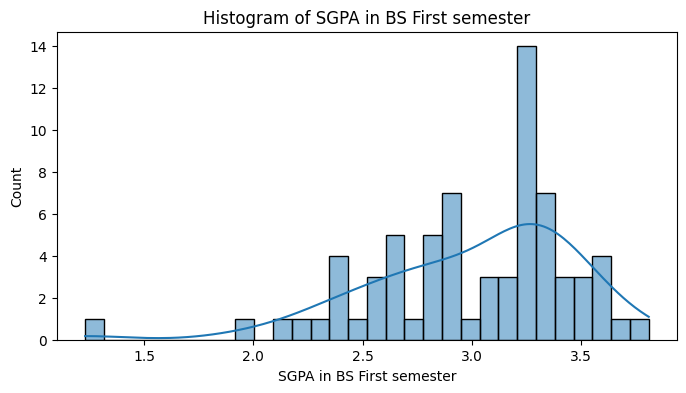

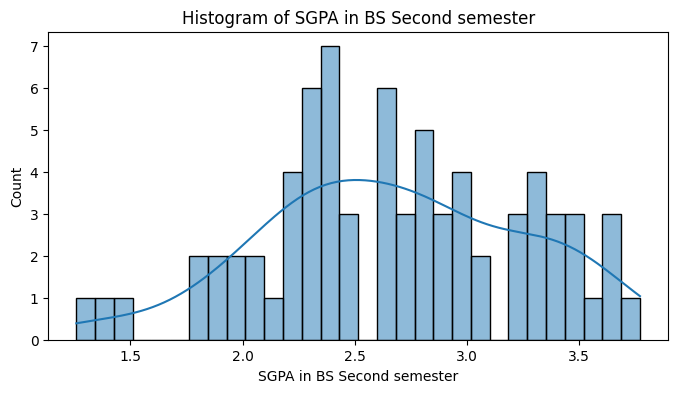

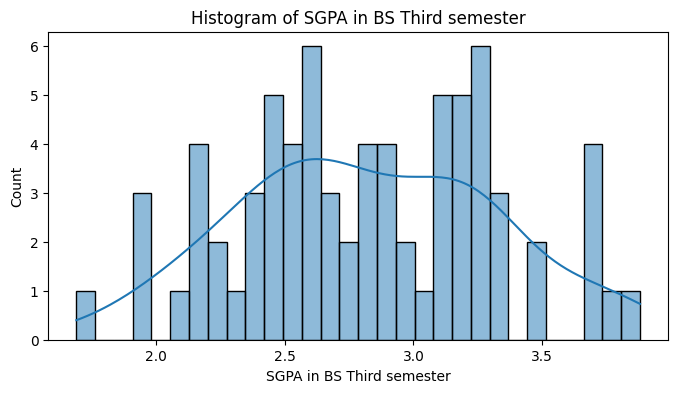

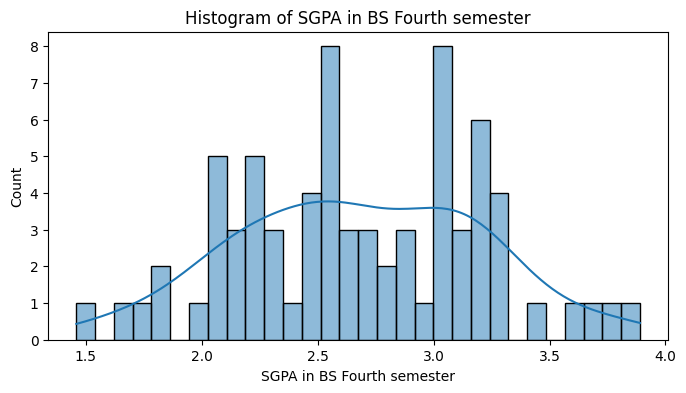

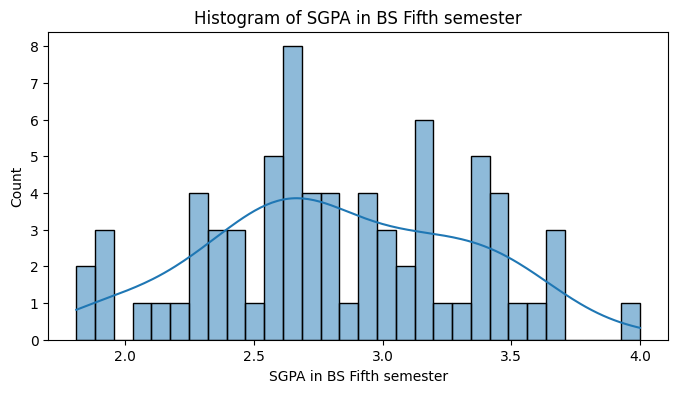

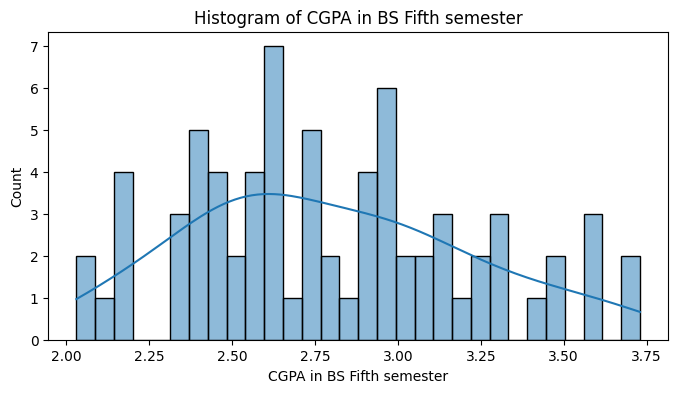

In [9]:
# Histograms for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()
#This code will create histograms for each numerical column to visualize their distributions.

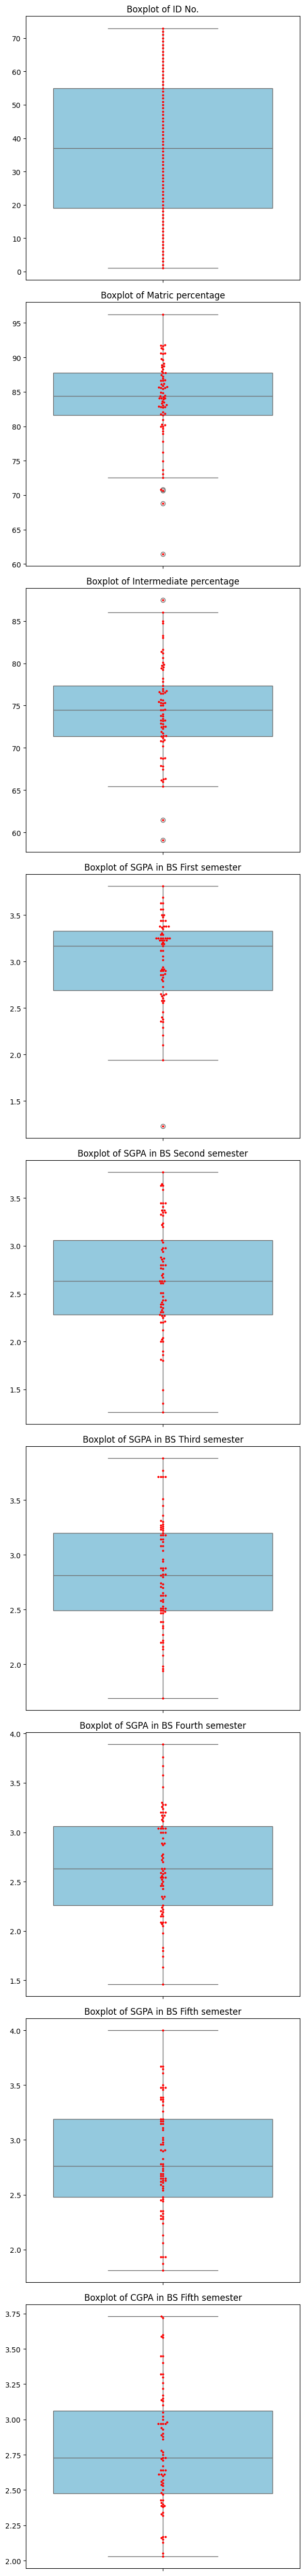

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette for the plots
sns.set_palette("Set2")

# Set the figure size
plt.figure(figsize=(6, 50))  # Adjusted the figure size for vertical arrangement

# Create box plots for numerical columns
for index, col in enumerate(numerical_cols, start=1):
    plt.subplot(len(numerical_cols), 1, index)  # Changed the subplot arrangement for vertical display
    sns.boxplot(data=df, y=col, color='skyblue')  # Use y=col for vertical orientation
    sns.swarmplot(data=df, y=col, color='red', size=3)  # Show data points as red dots
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()  # Adjust subplot spacing for a better layout
plt.show()


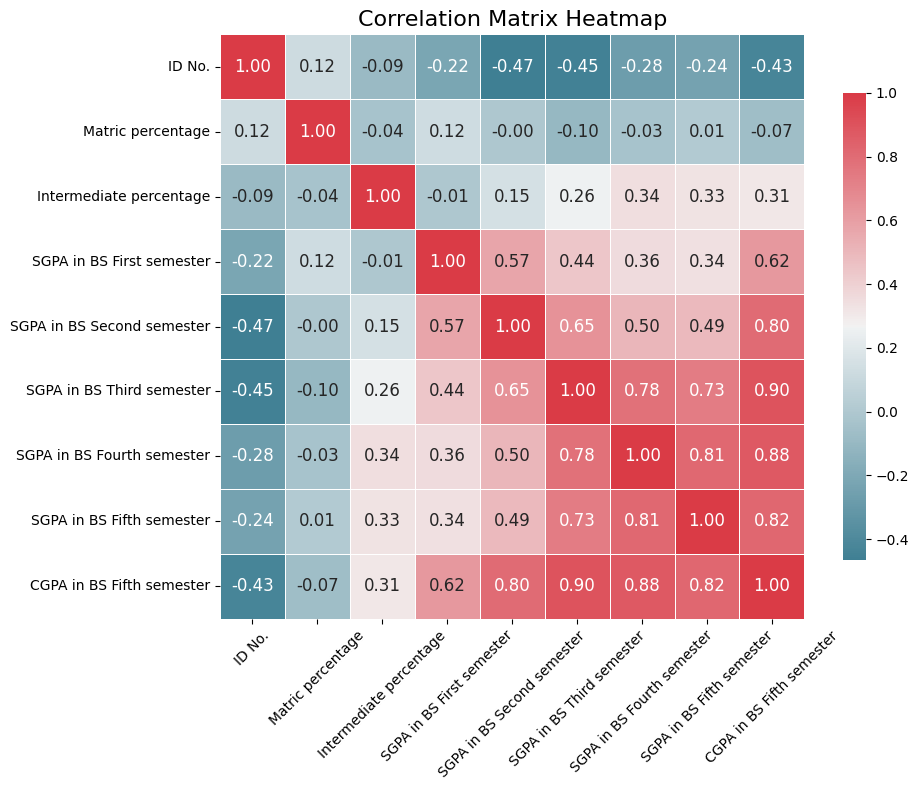

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = df[numerical_cols].corr()

# Set a custom color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with customizations
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f",  # Format the annotations to two decimal places
            cmap=cmap,
            square=True,  # Make the cells square
            linewidths=0.5,  # Add white lines between cells
            cbar_kws={'shrink': 0.8},  # Customize colorbar size
            annot_kws={'size': 12},  # Customize annotation font size
           )

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability

plt.tight_layout()
plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a color palette for the plots
sns.set_palette("Set3")

# Create a figure with subplots
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, len(categorical_cols) * 6))

# Loop through categorical columns and create count plots
for index, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette='Set3', ax=axes[index])
    axes[index].set_xlabel(col)
    axes[index].set_ylabel('Count')
    axes[index].set_title(f'Count Plot of {col}')
    axes[index].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


NameError: name 'categorical_cols' is not defined

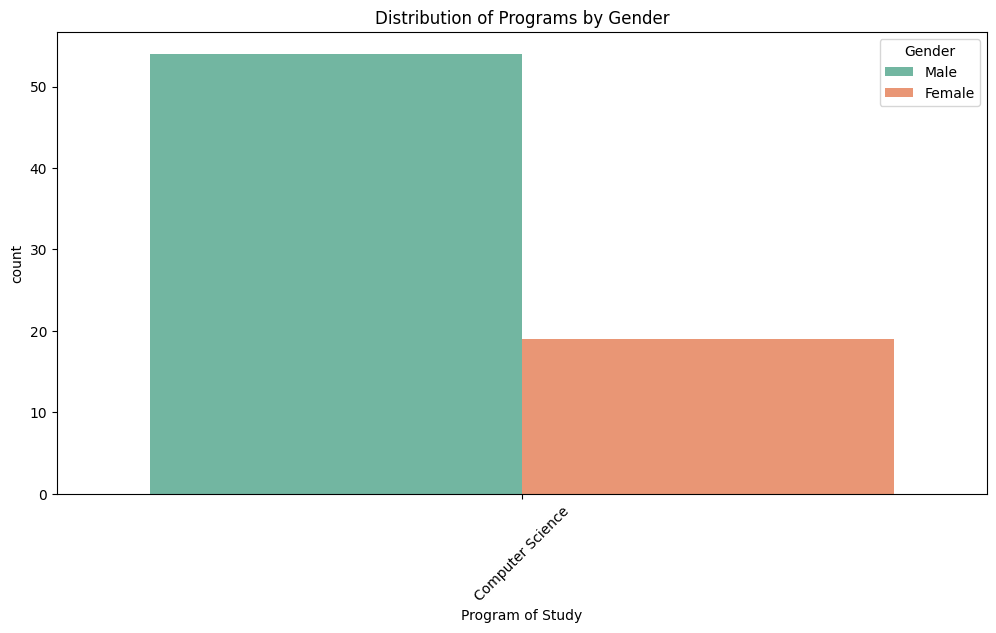

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Program of Study', hue='Gender', palette='Set2')
plt.title('Distribution of Programs by Gender')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\547728405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Program of Study', y='CGPA in BS Fifth semester', palette='Set3')


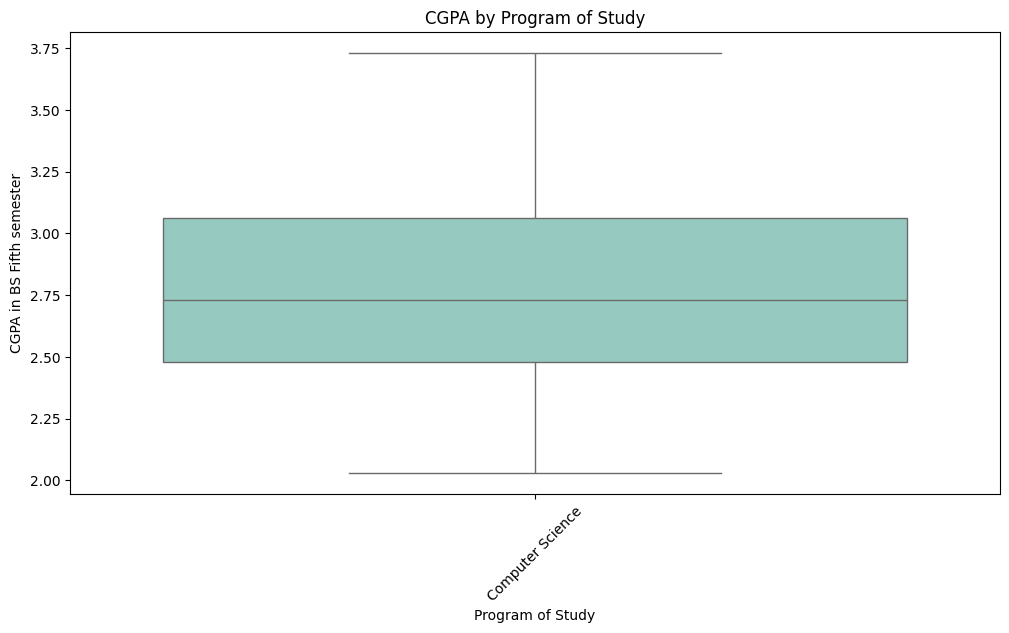

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Program of Study', y='CGPA in BS Fifth semester', palette='Set3')
plt.title('CGPA by Program of Study')
plt.xticks(rotation=45)
plt.show()


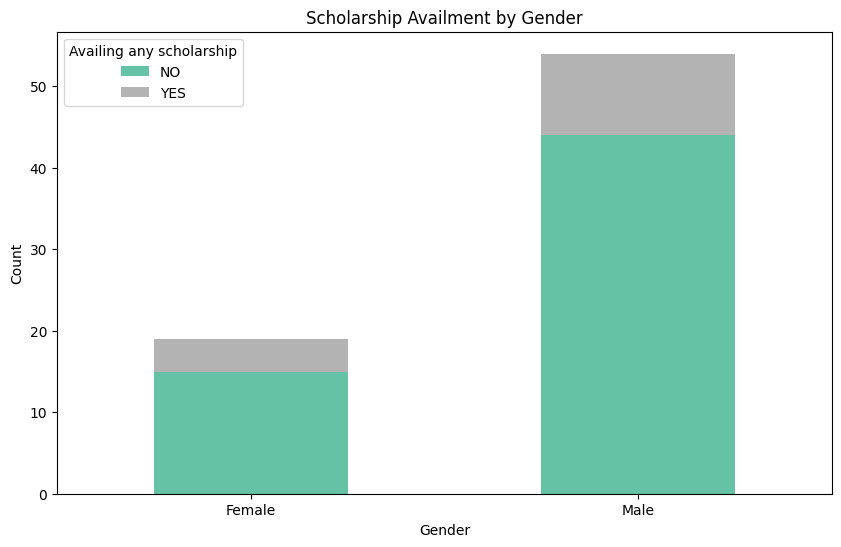

In [20]:
cross_tab = pd.crosstab(df['Gender'], df['Availing any scholarship'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Scholarship Availment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


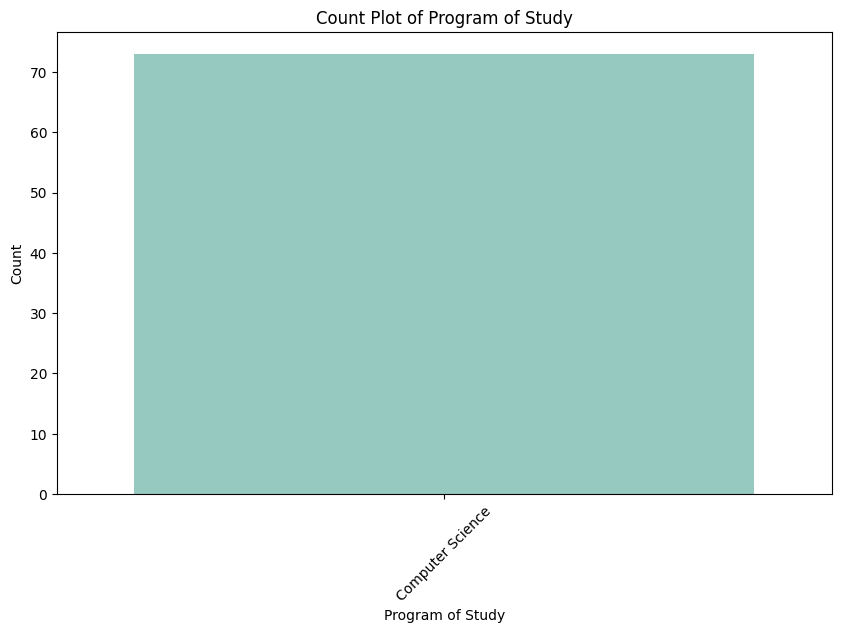

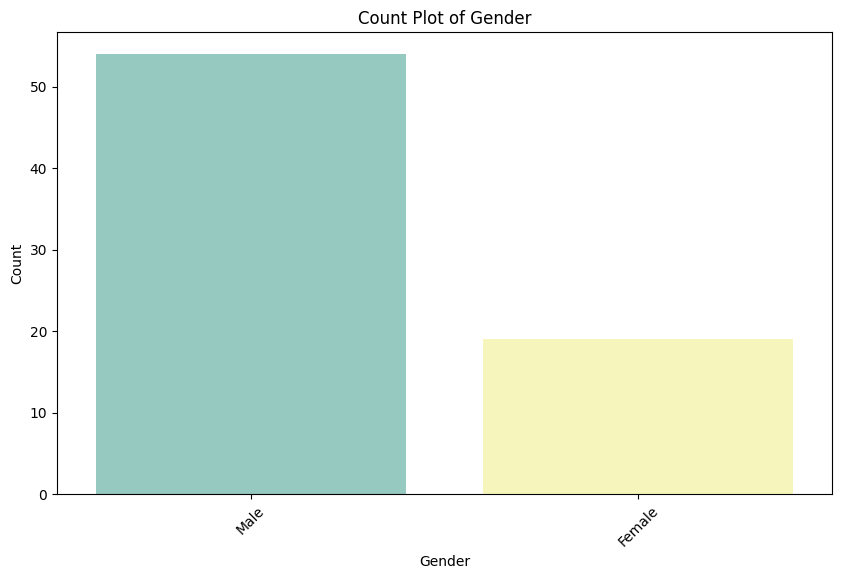

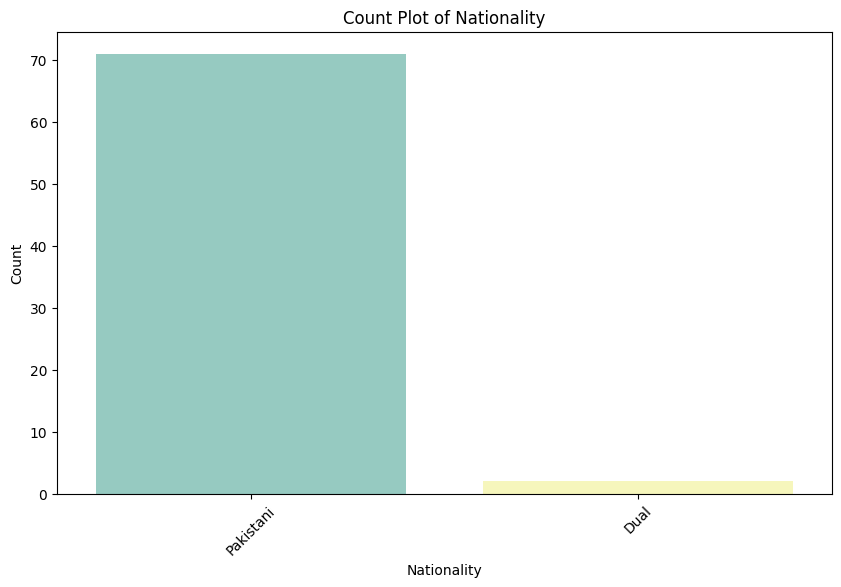

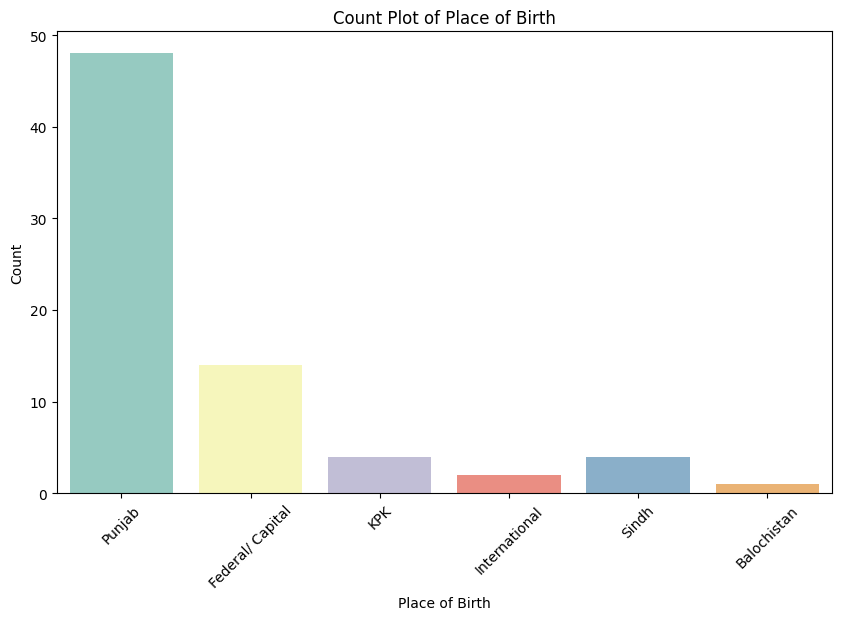

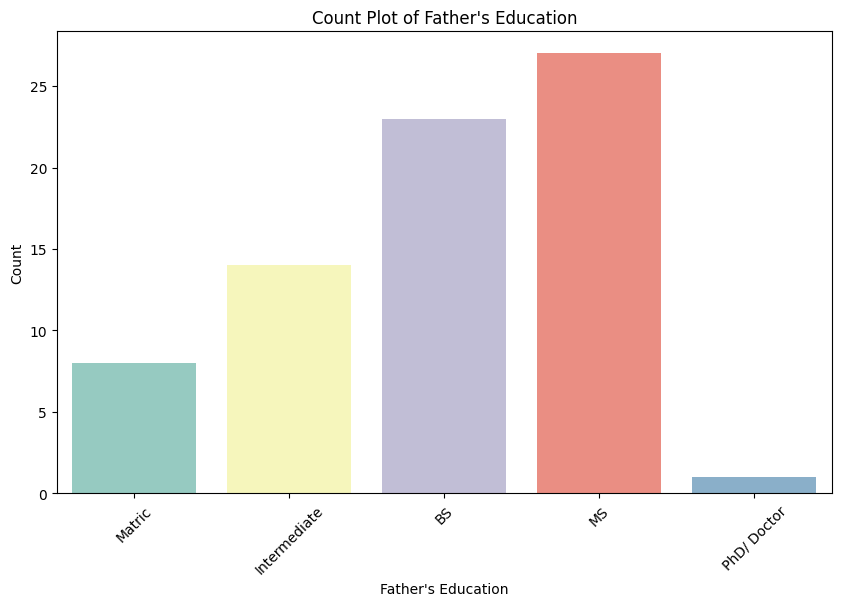

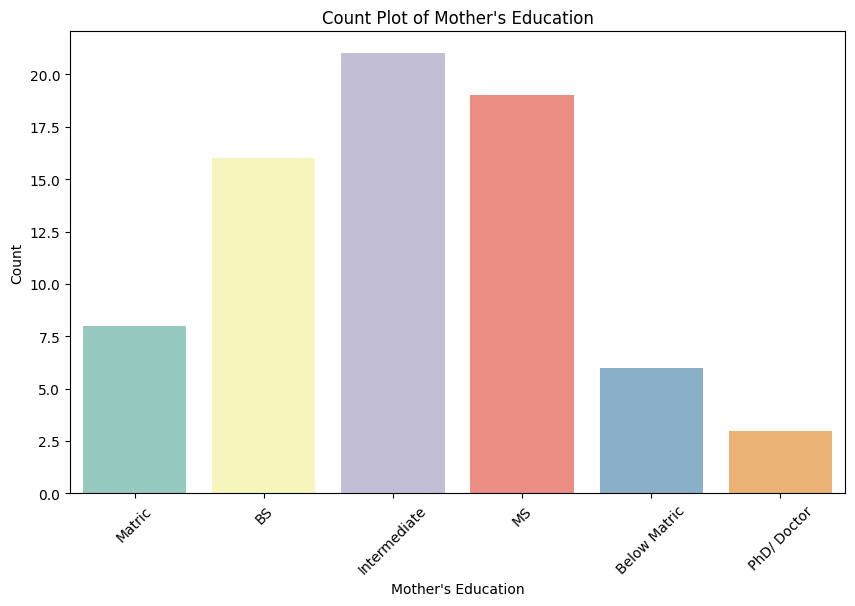

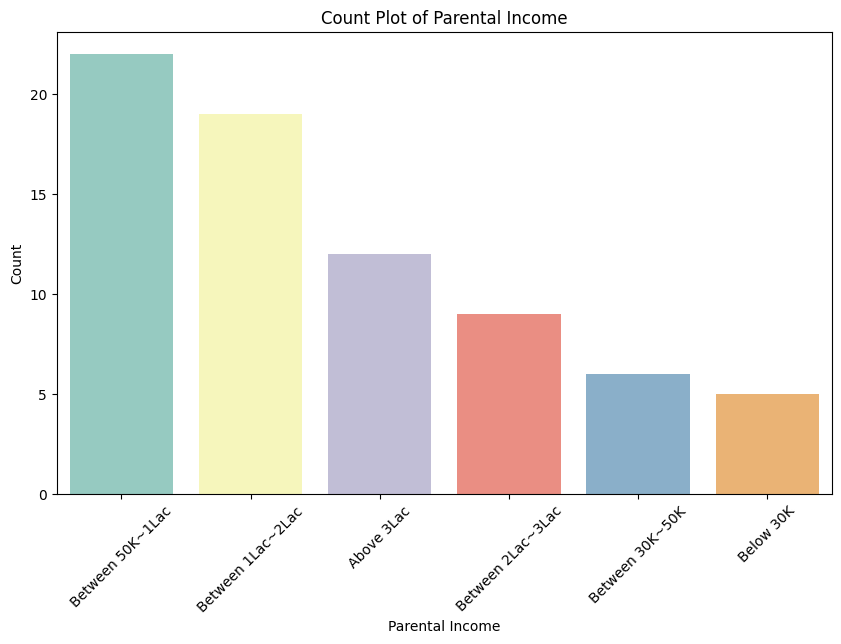

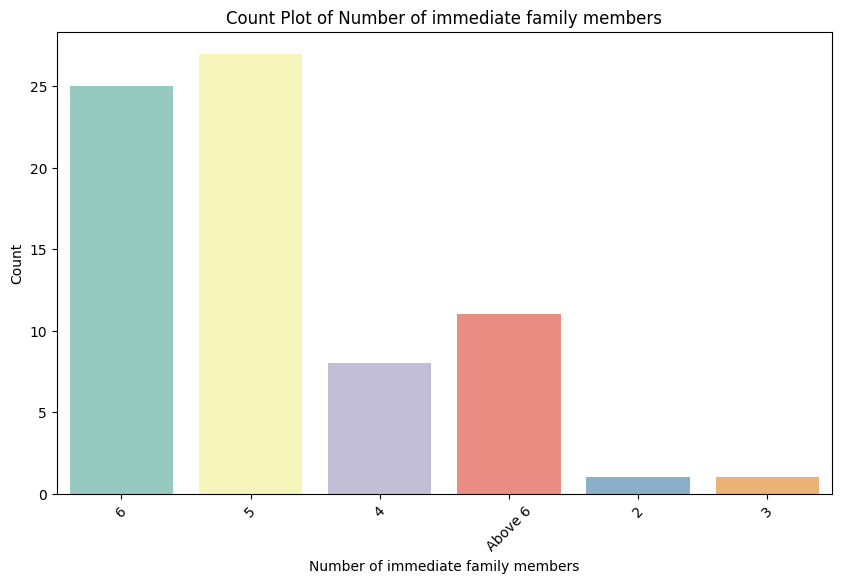

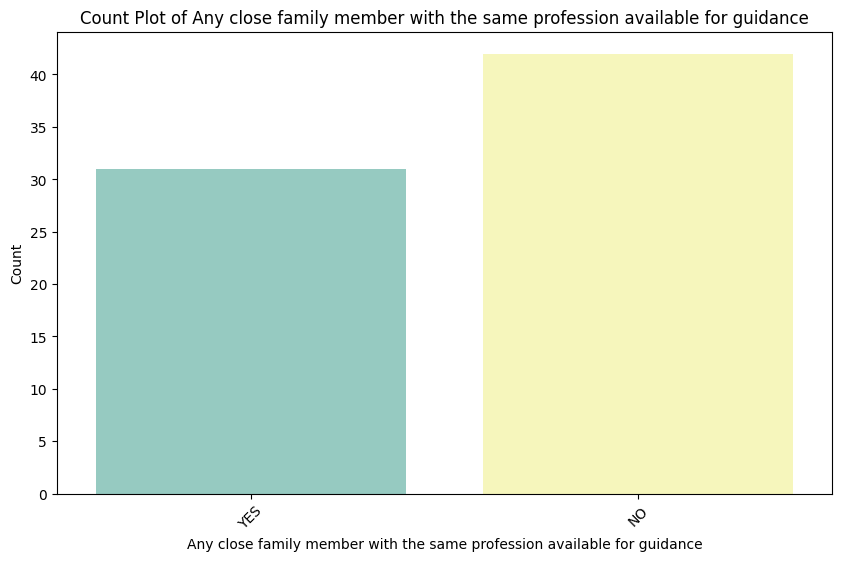

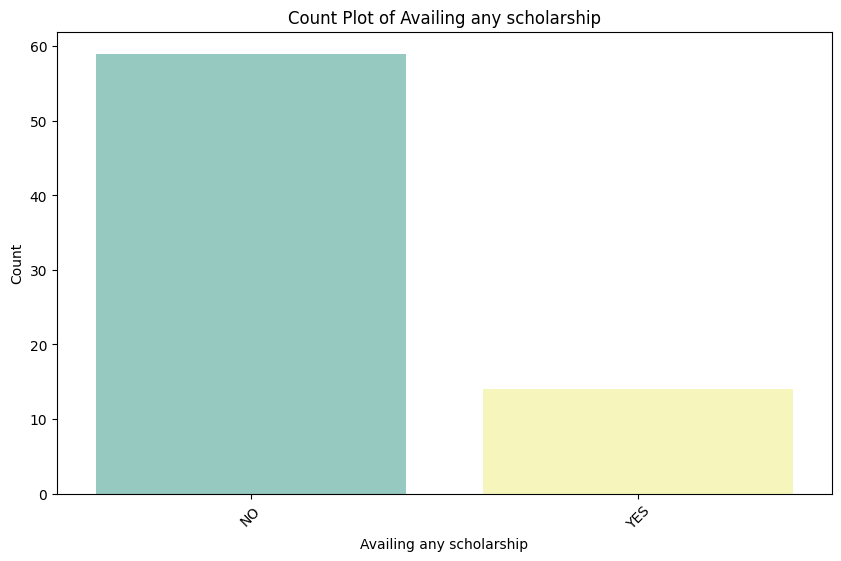

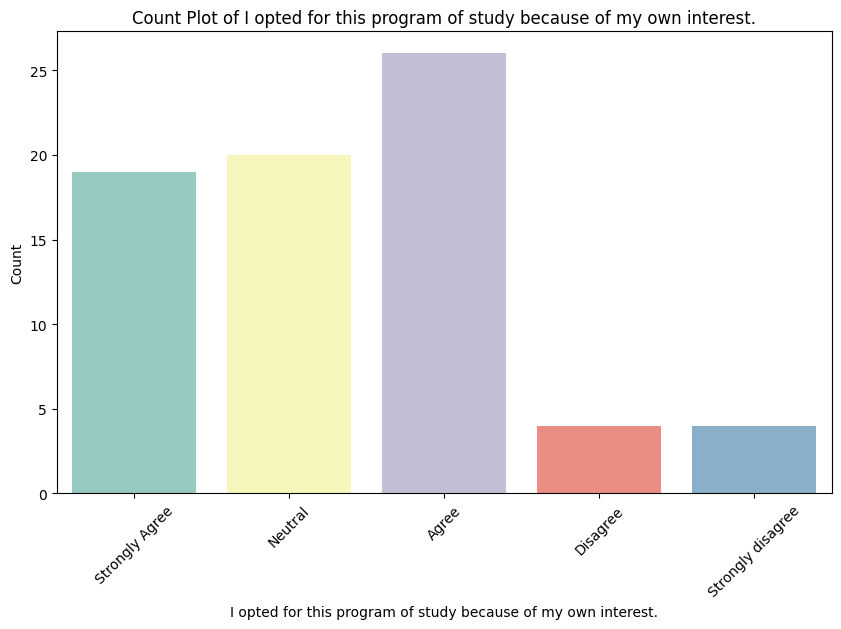

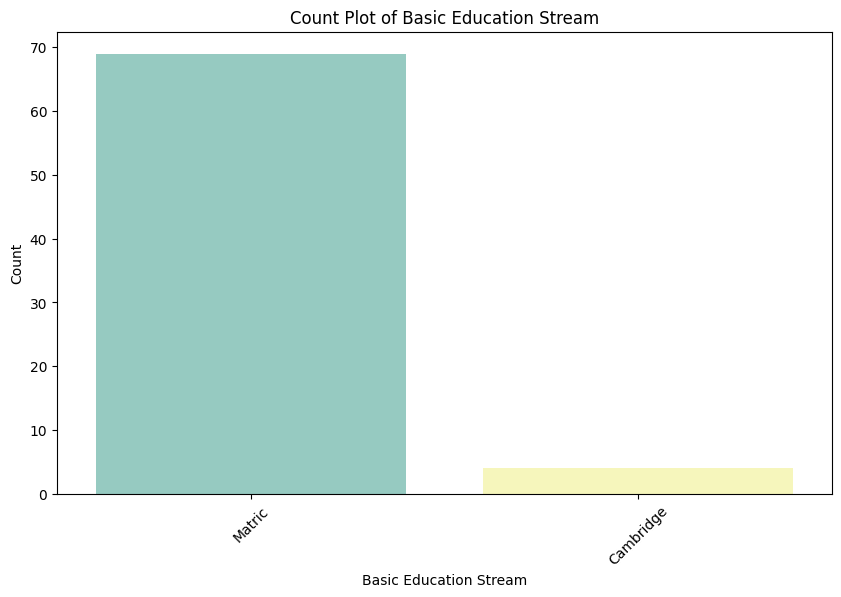

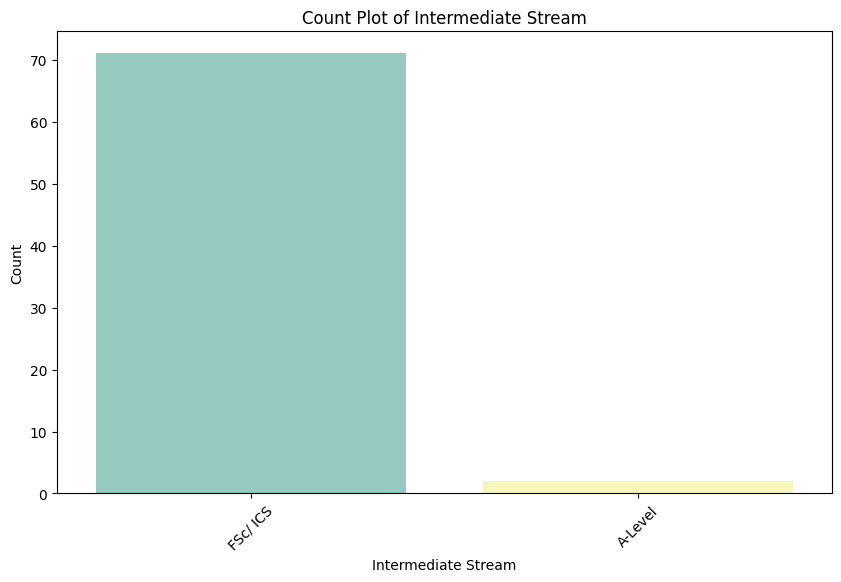

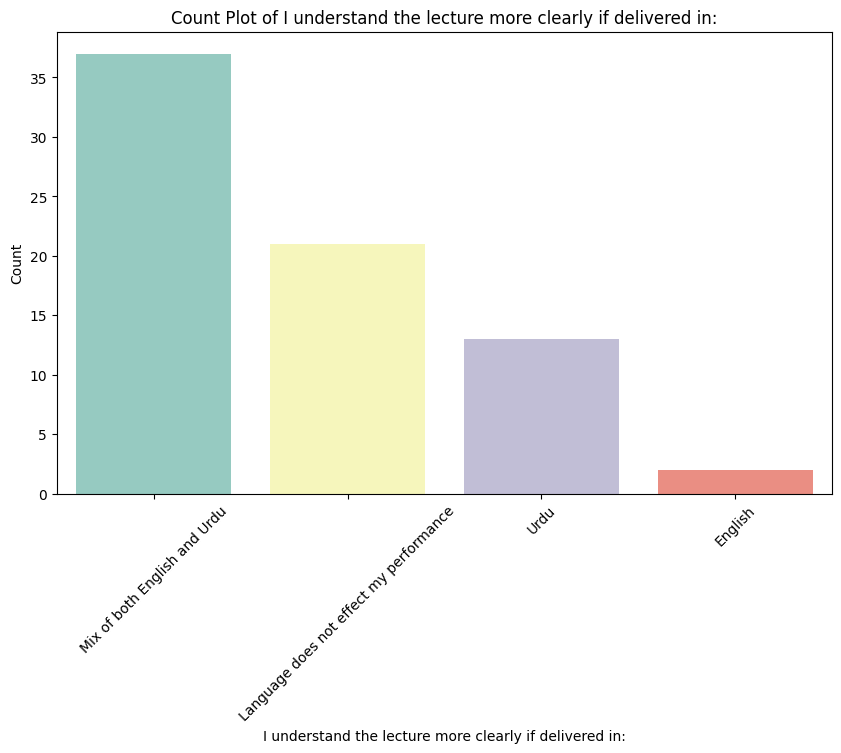

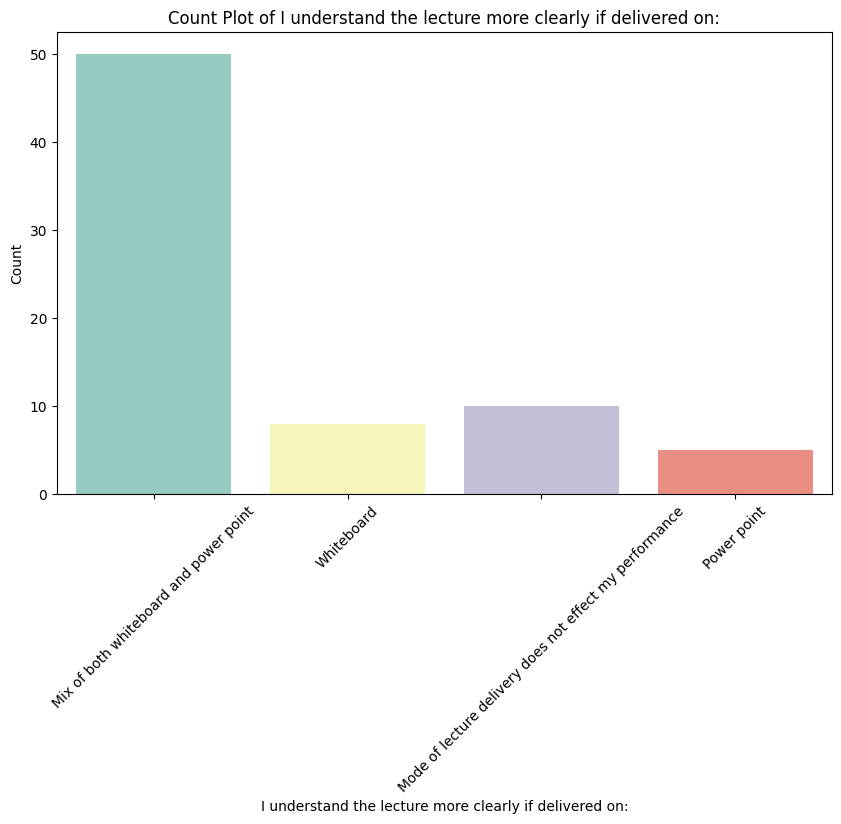

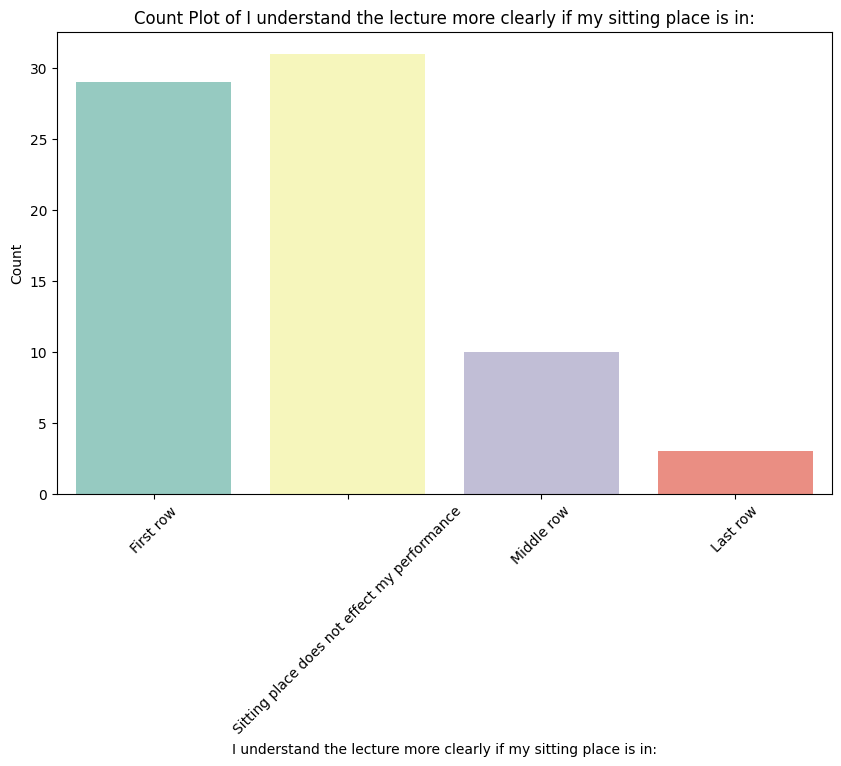

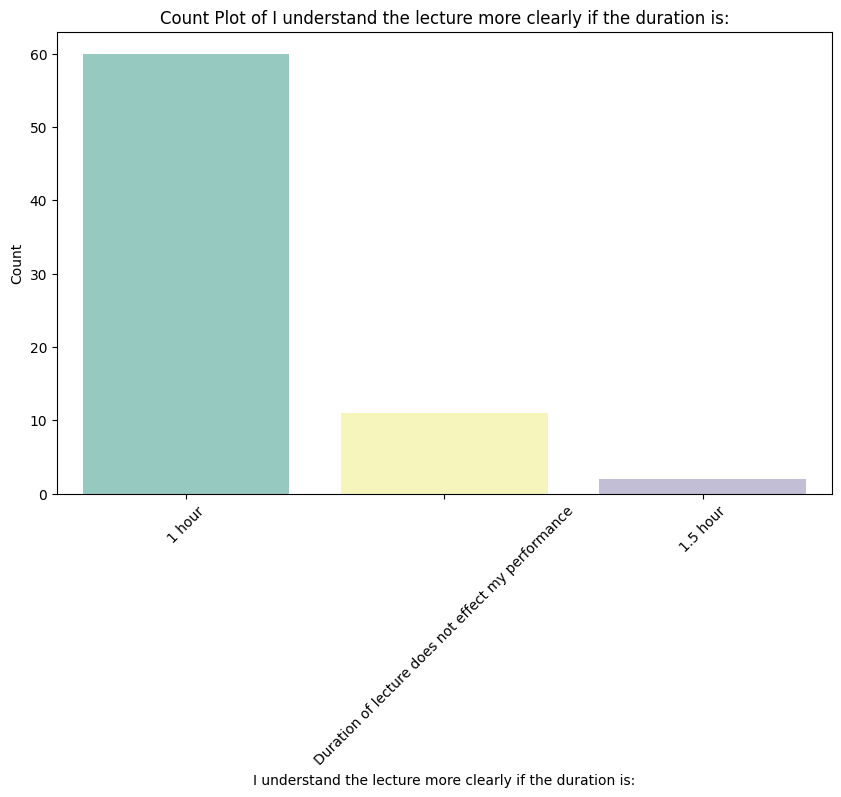

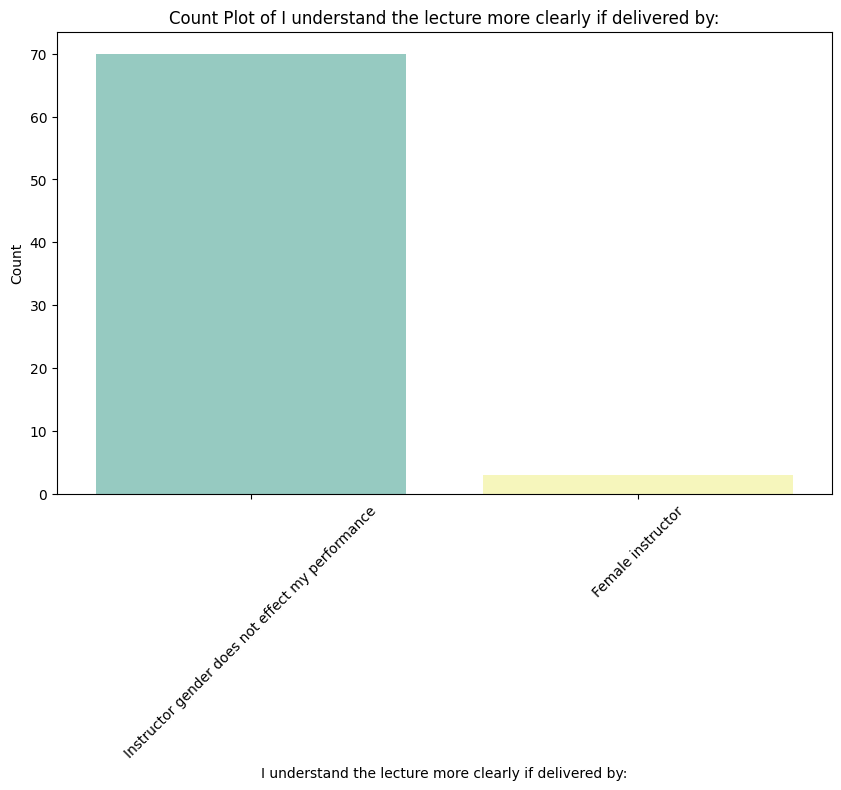

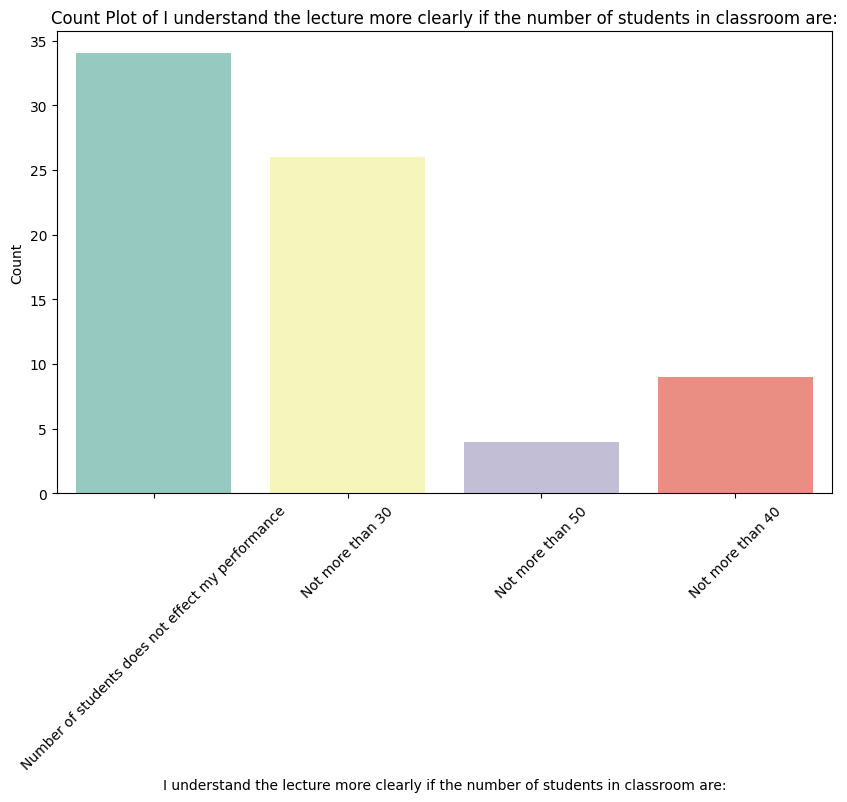

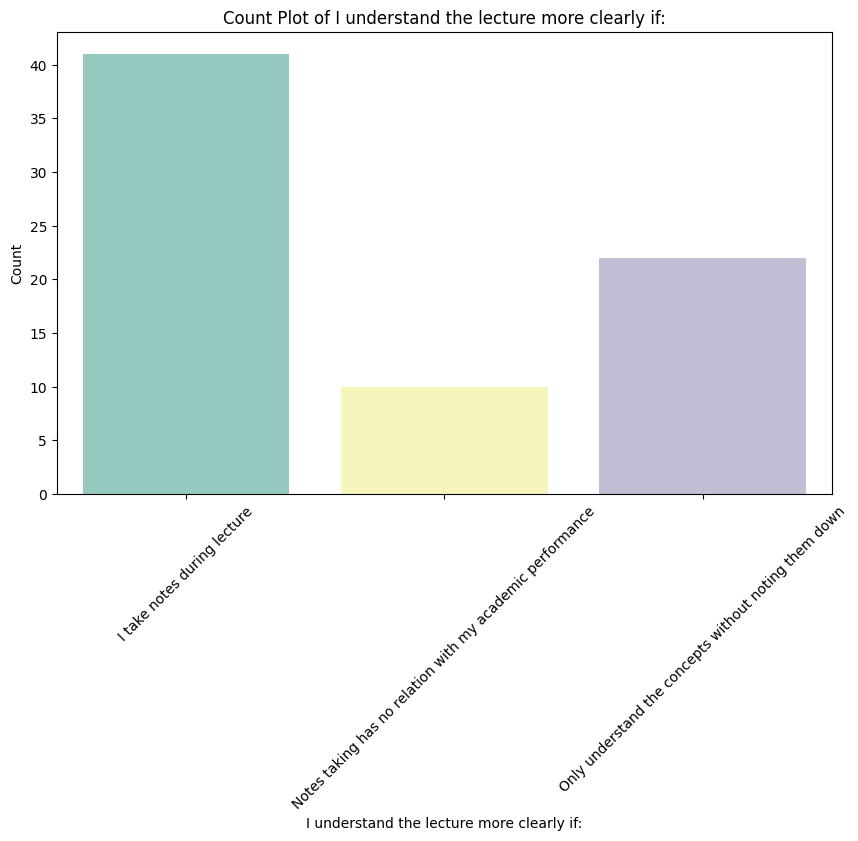

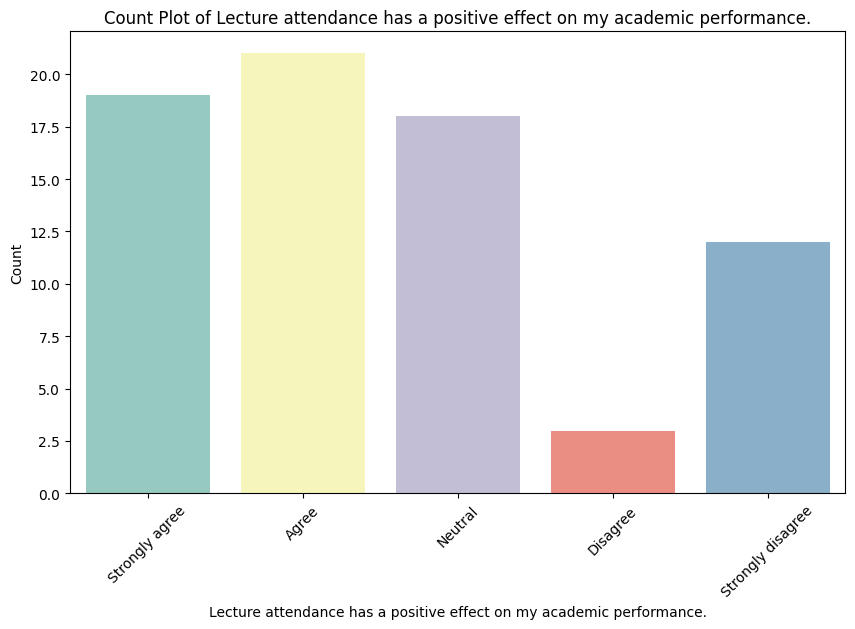

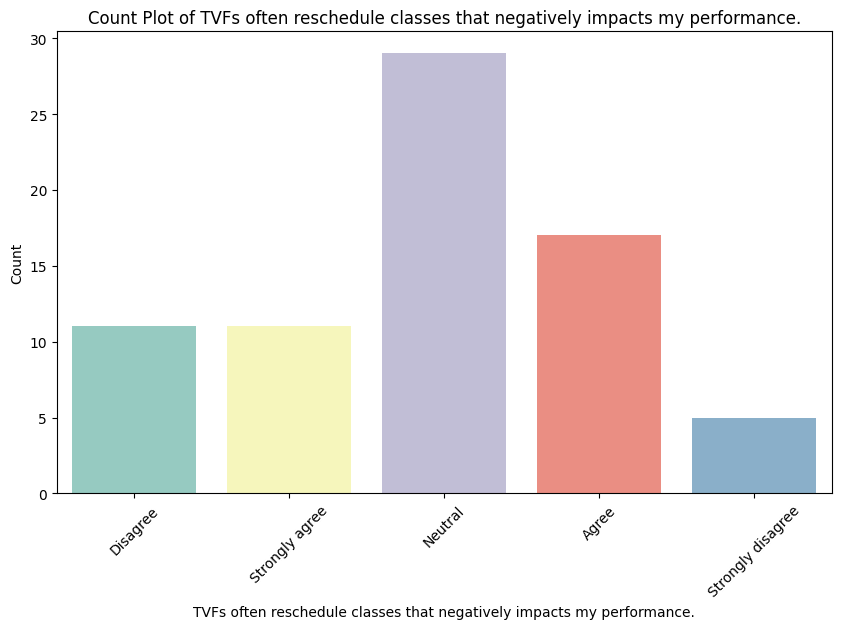

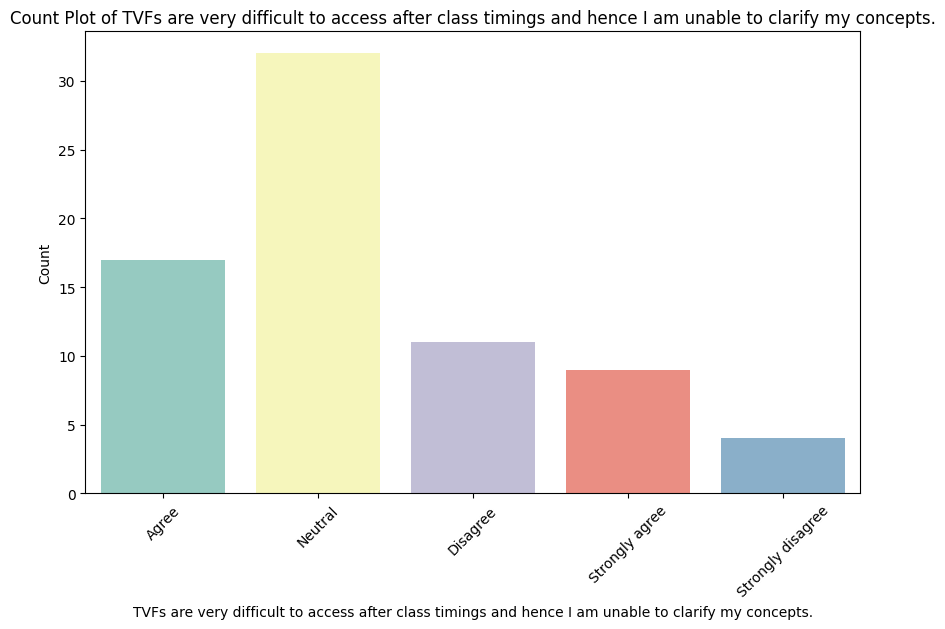

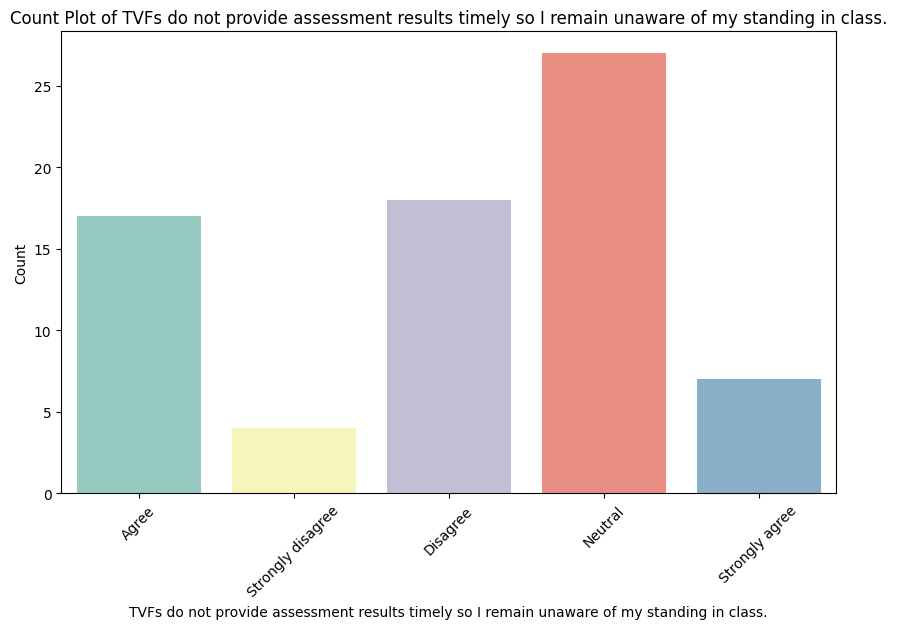

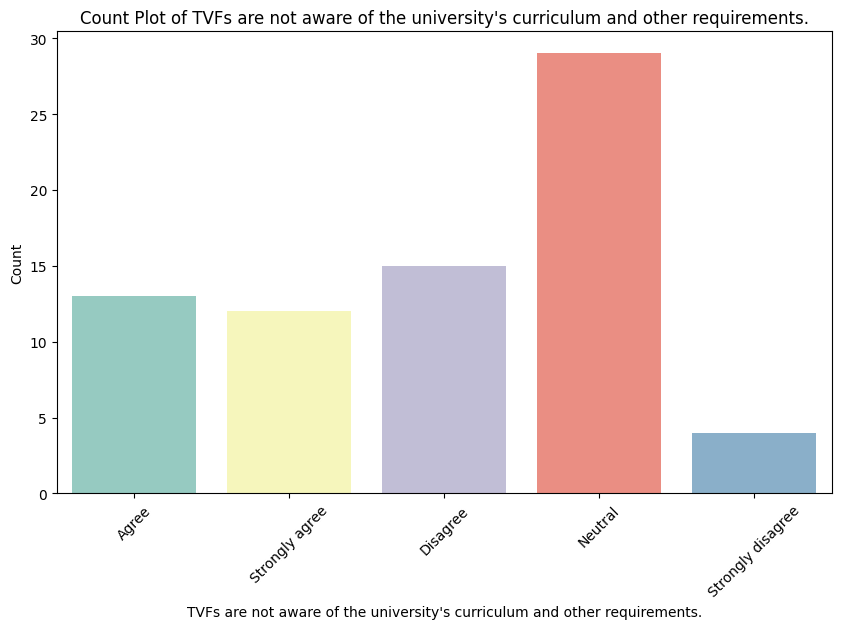

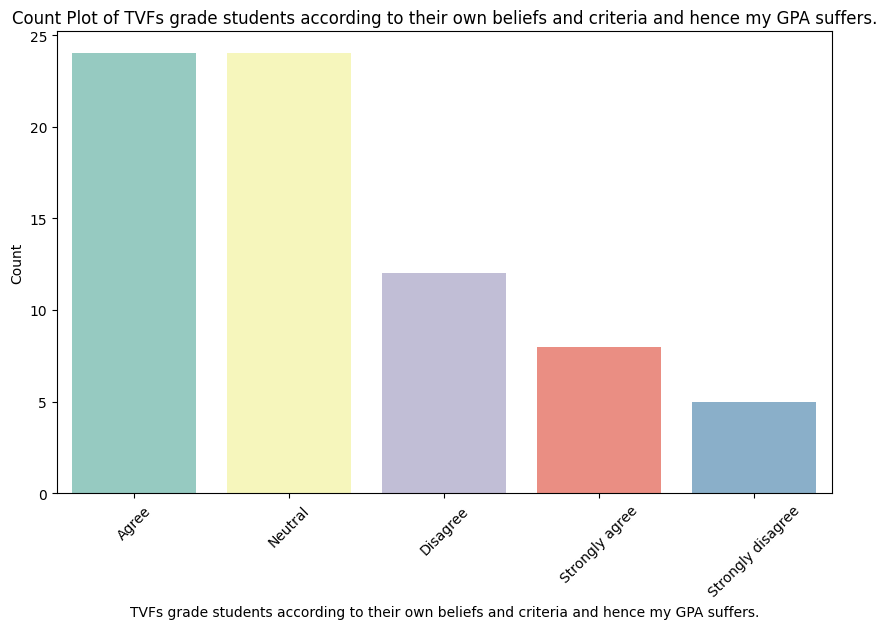

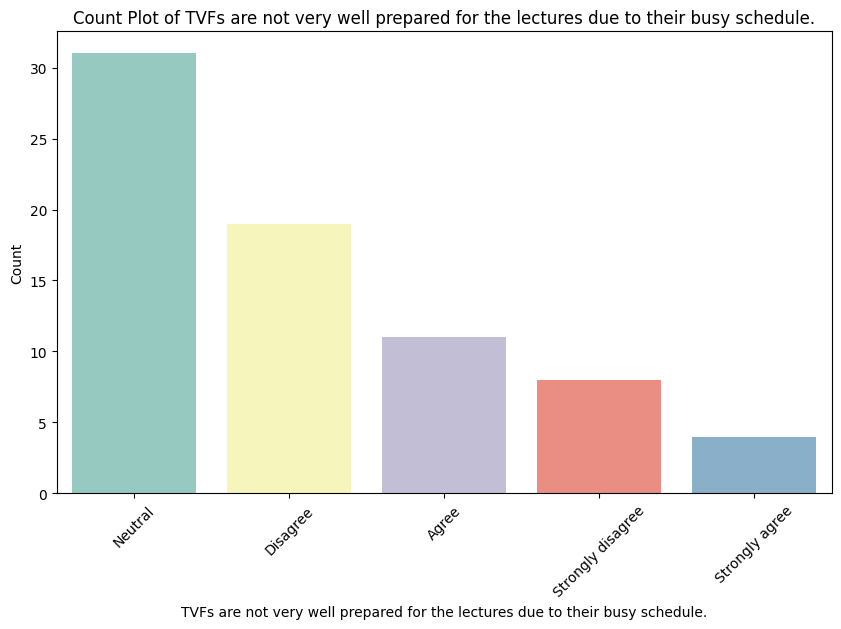

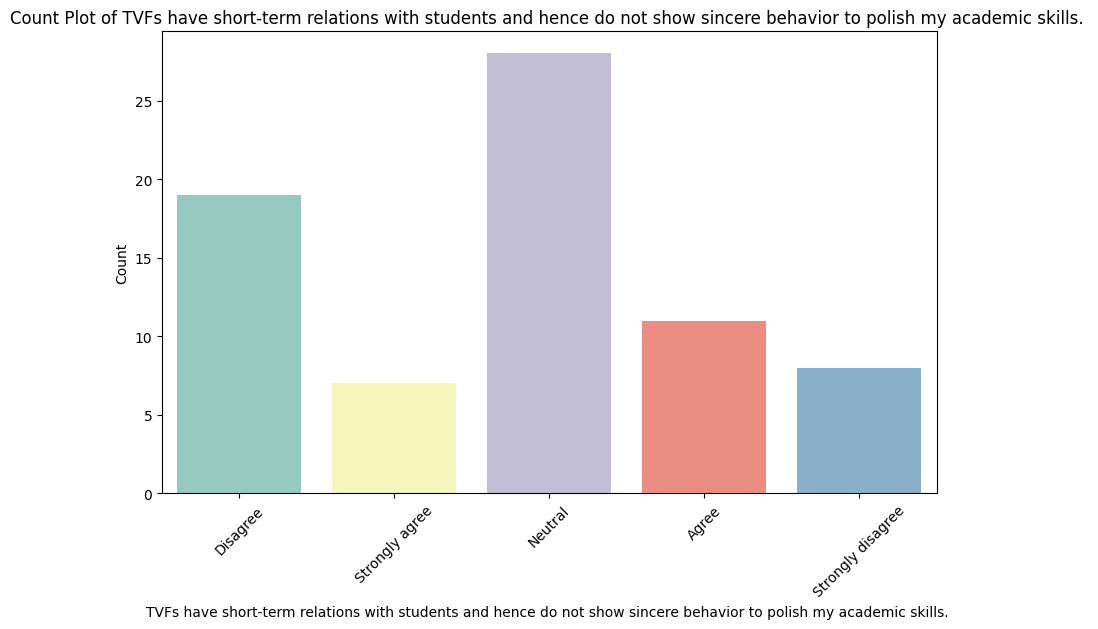

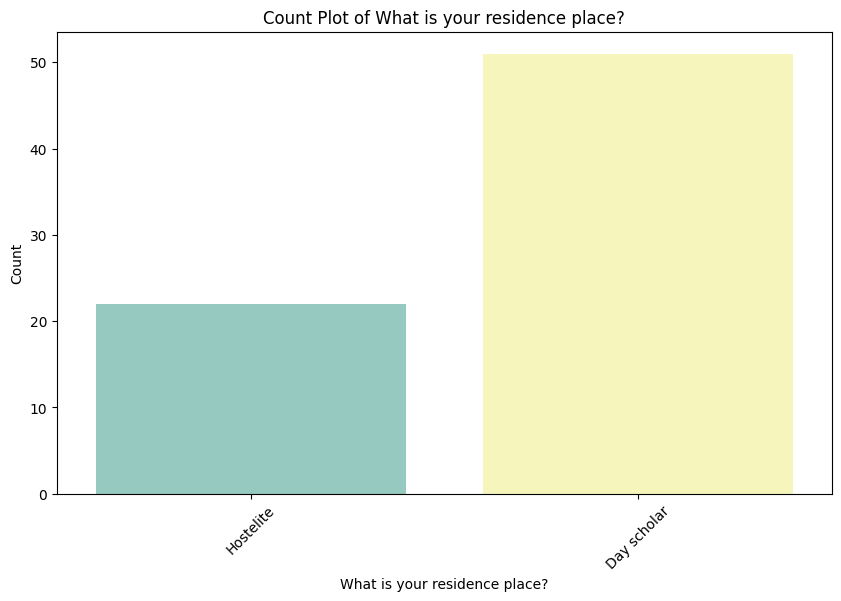

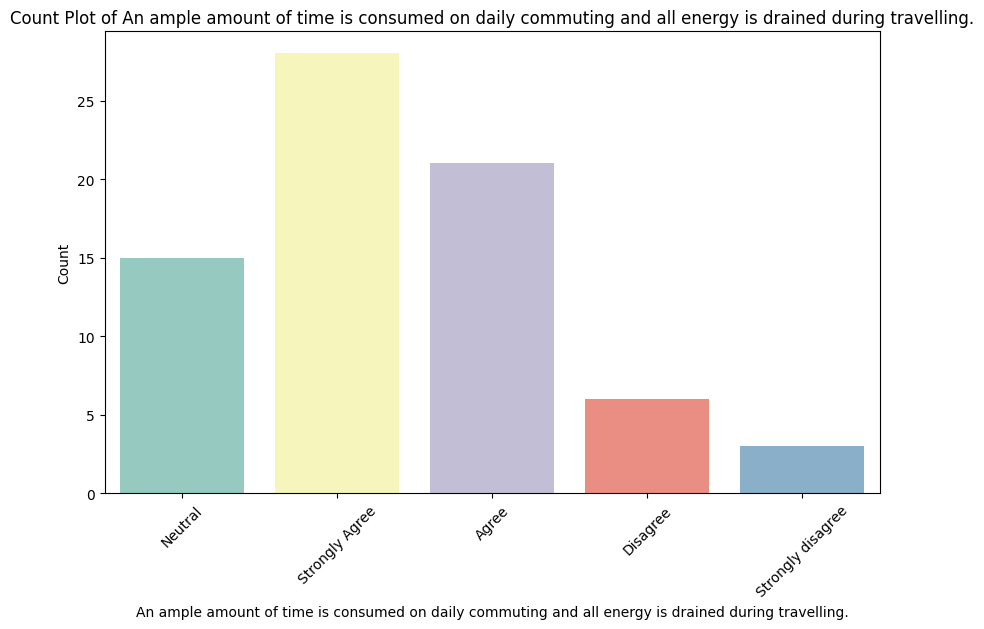

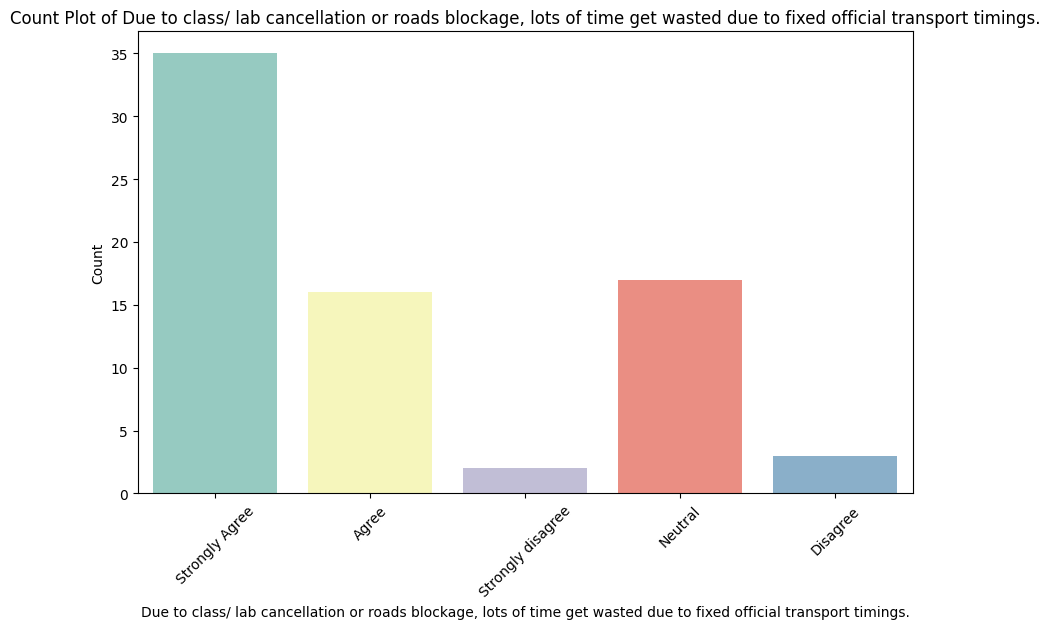

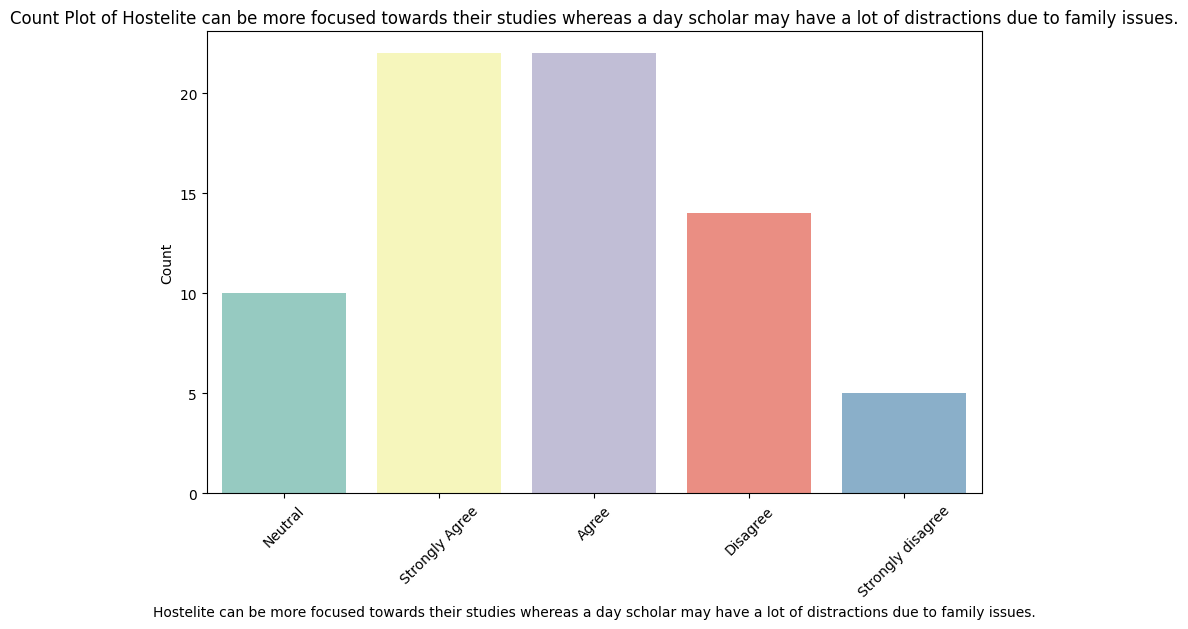

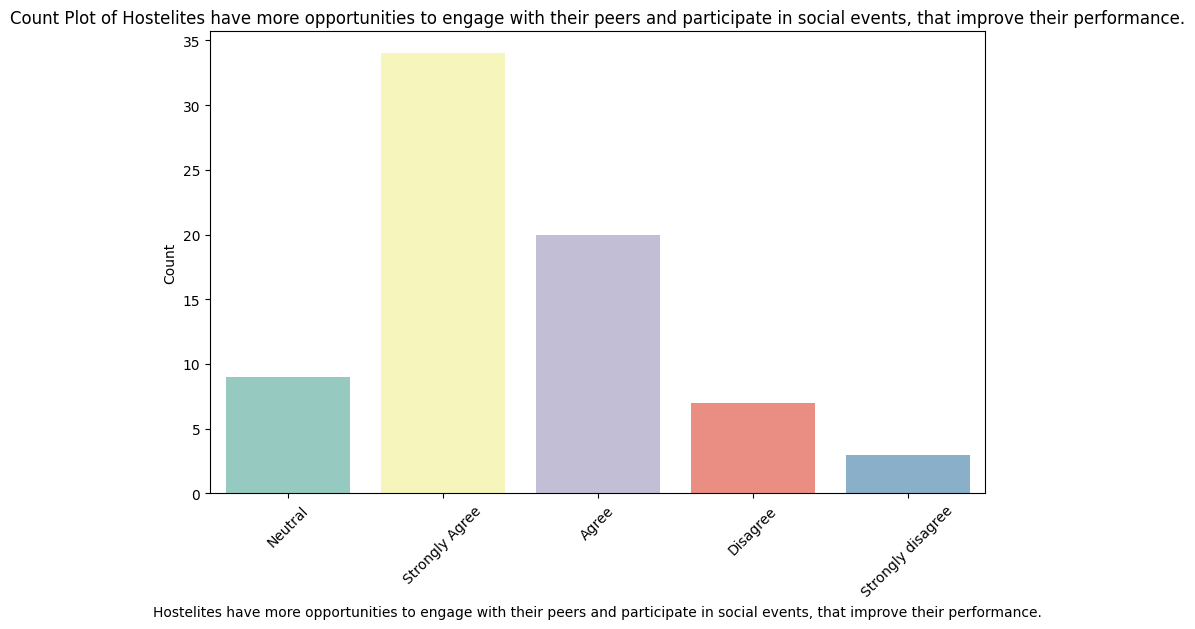

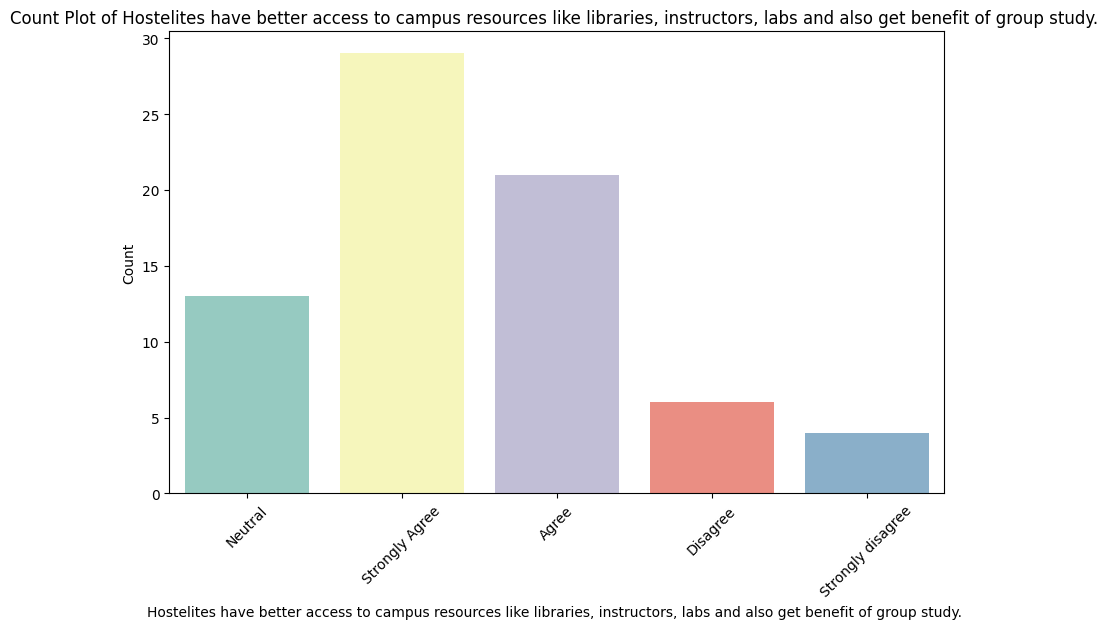

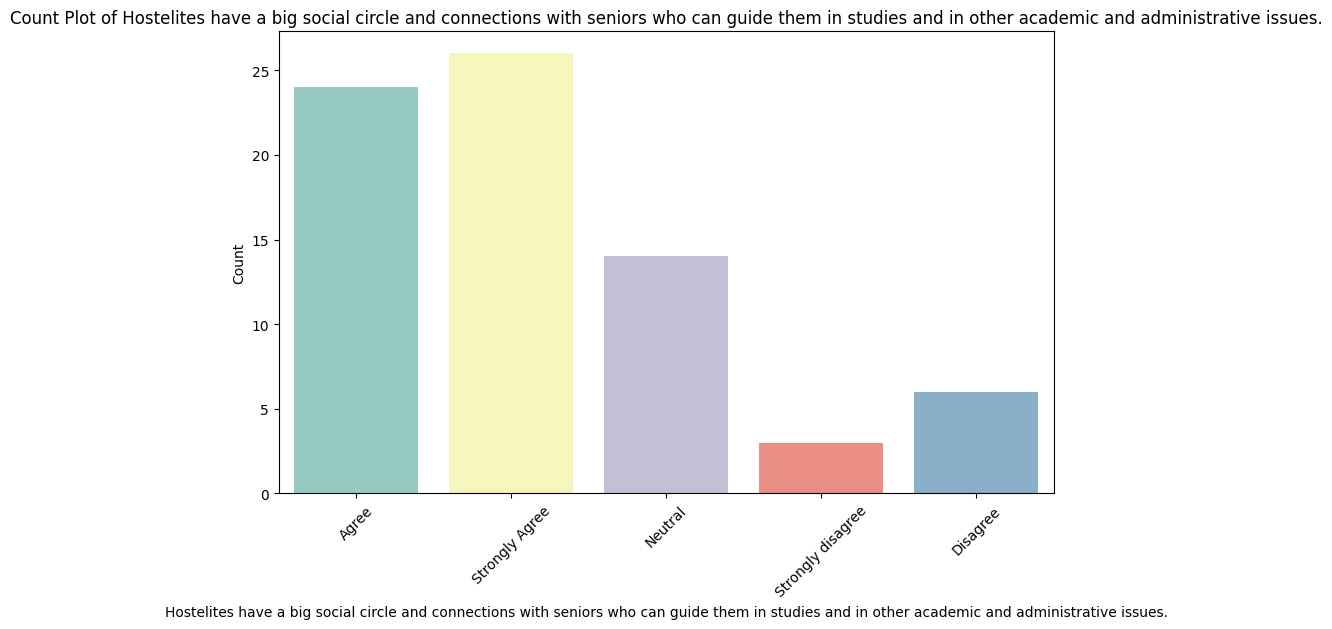

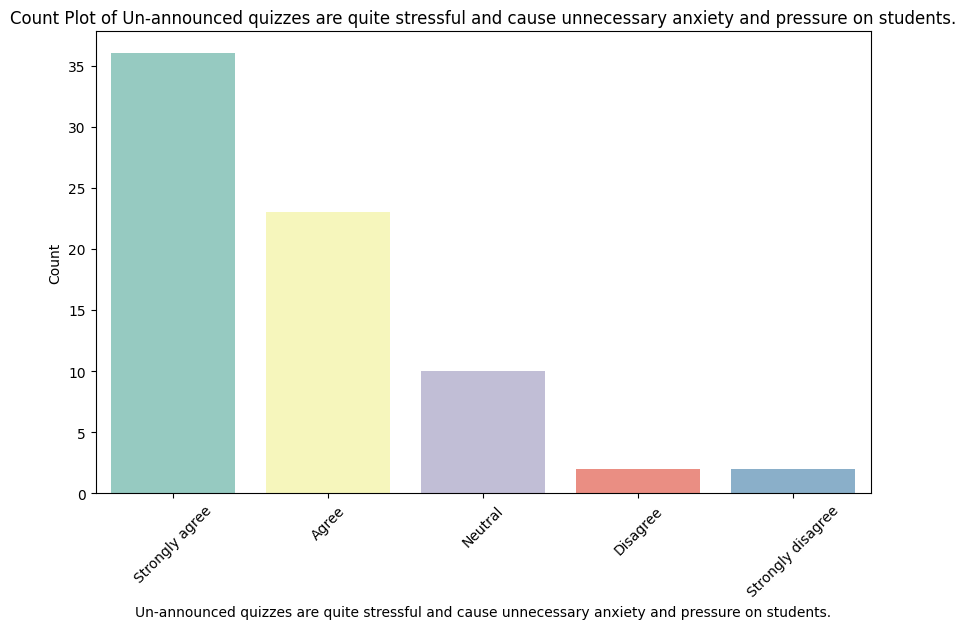

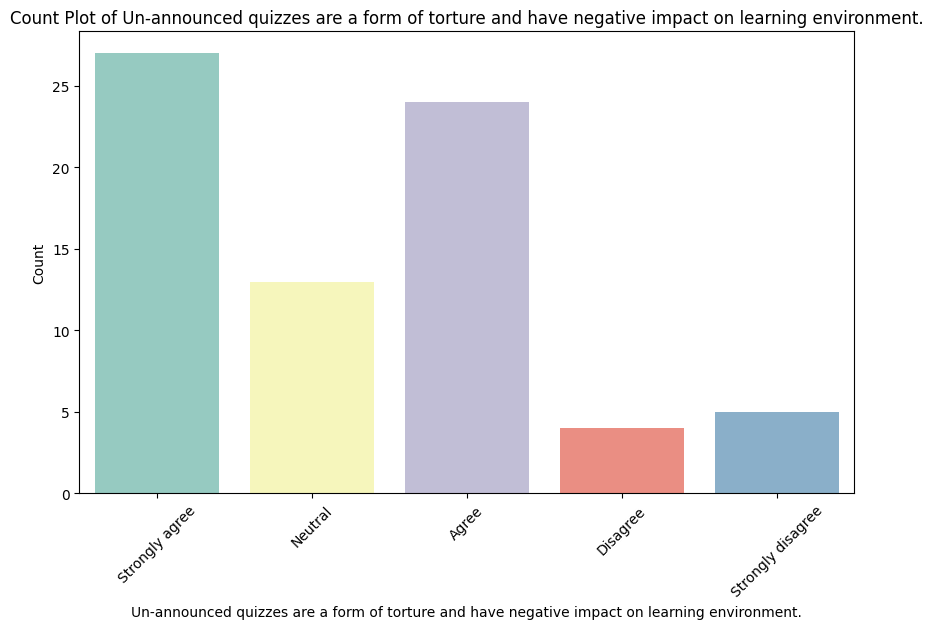

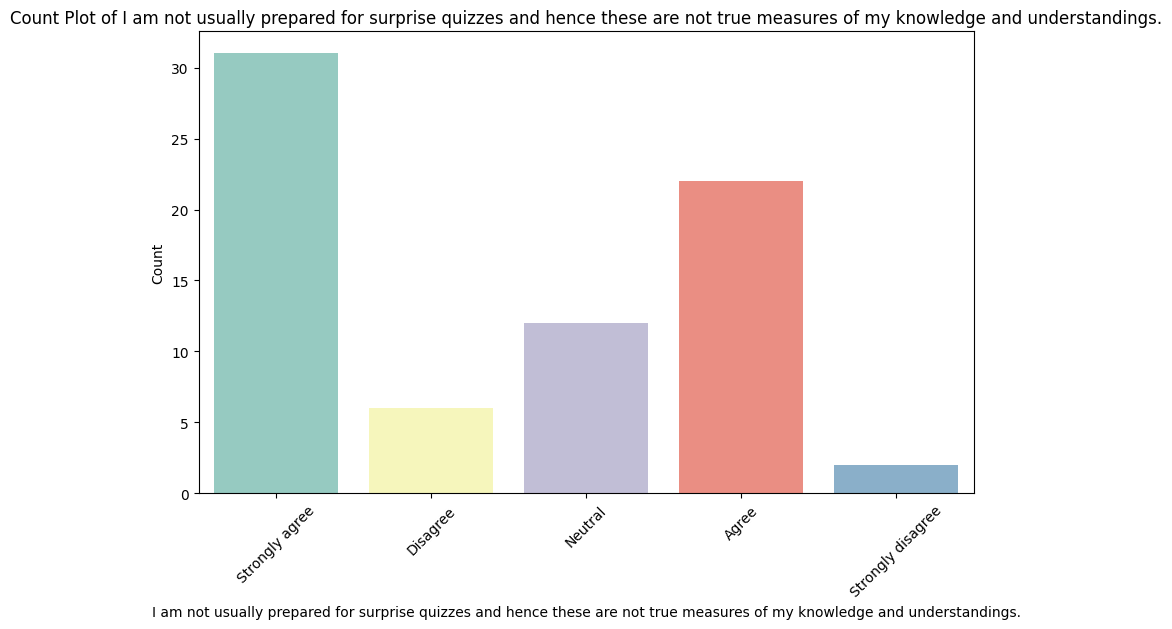

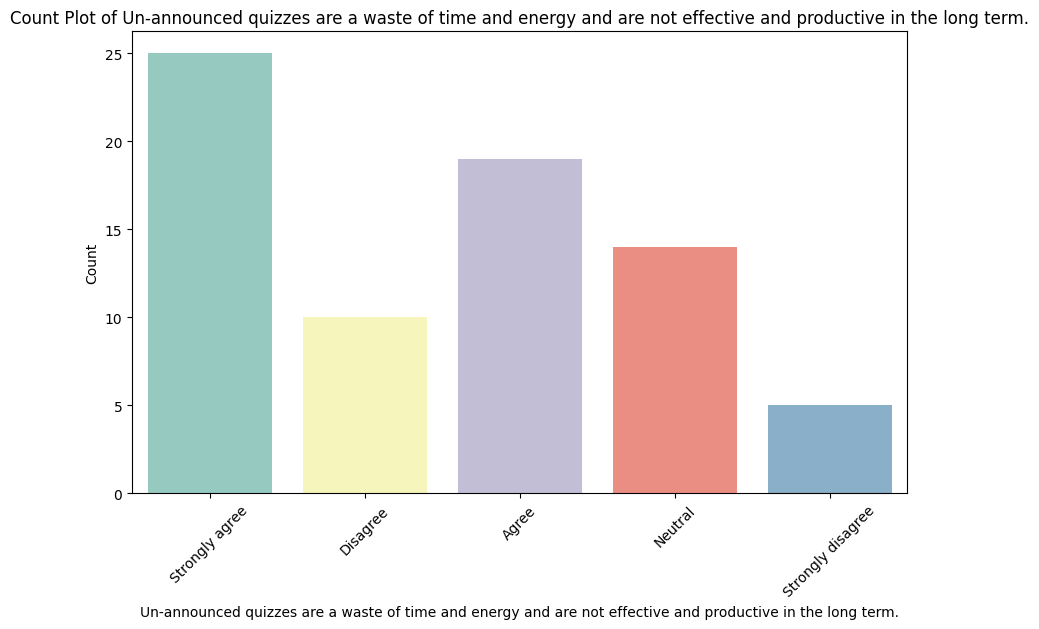

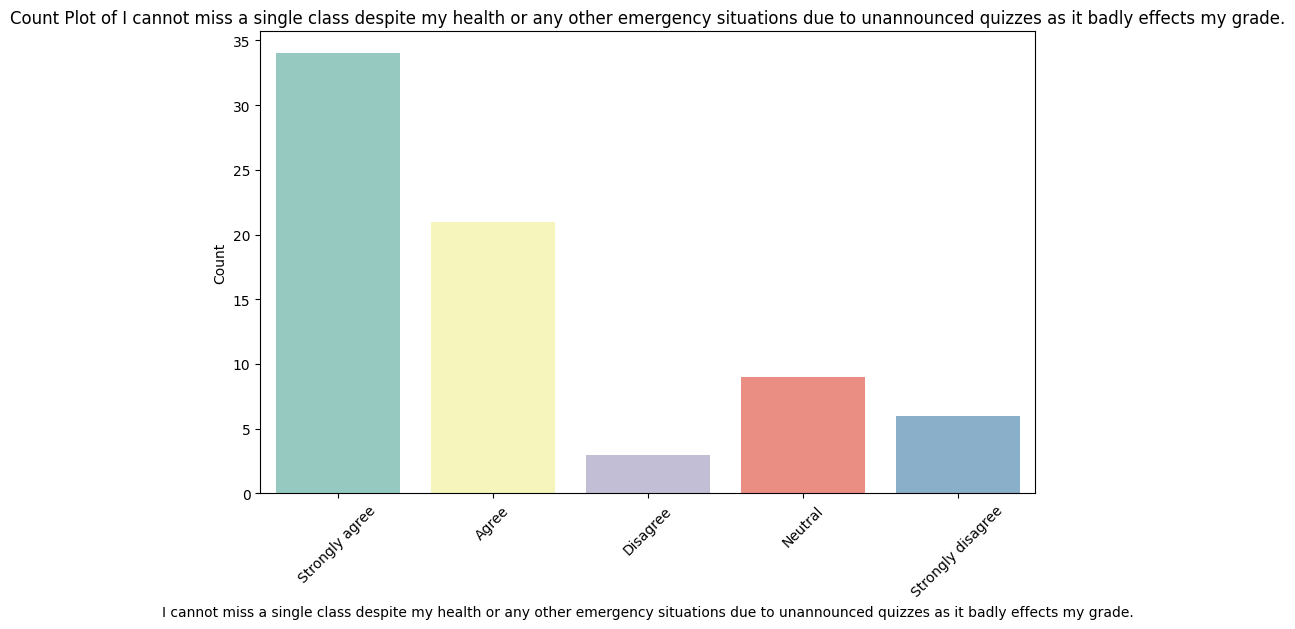

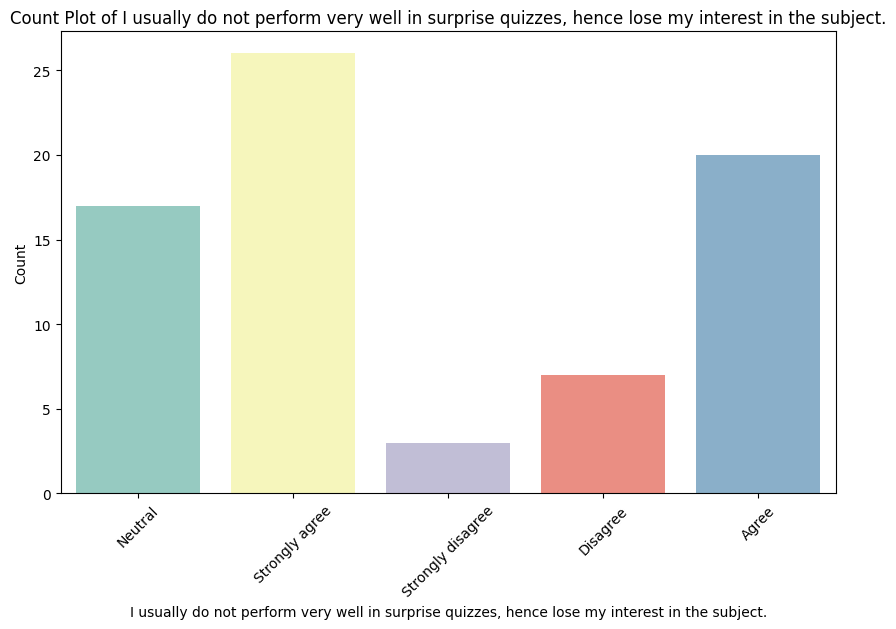

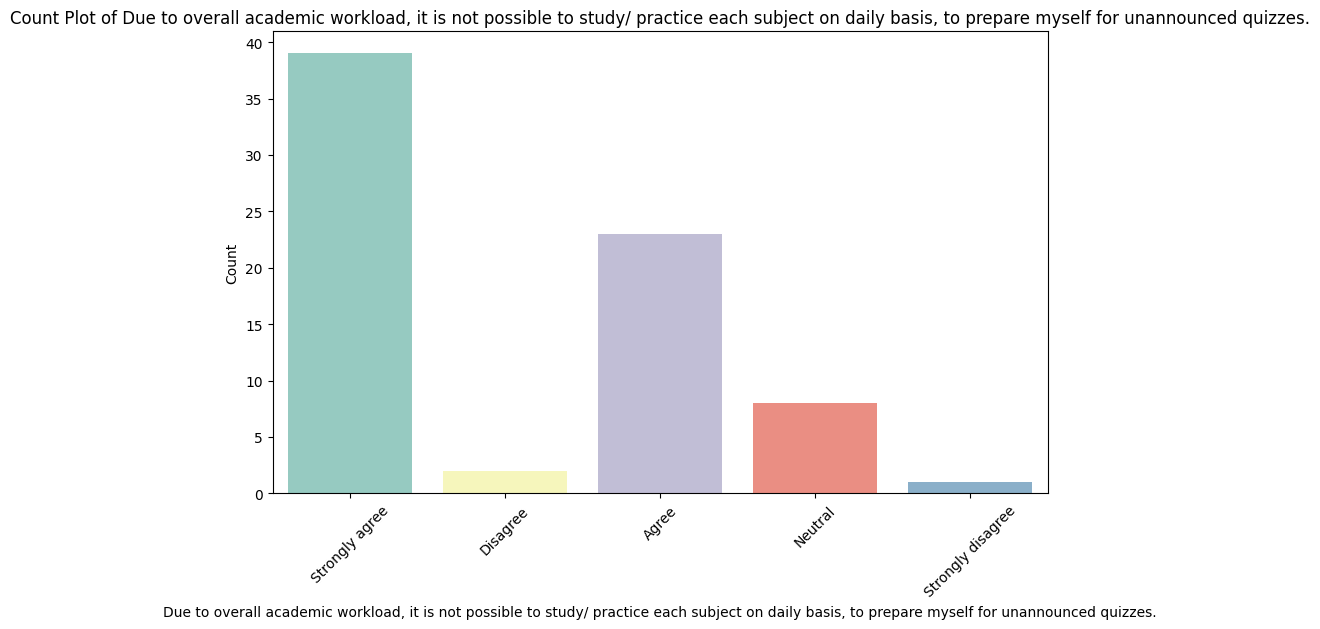

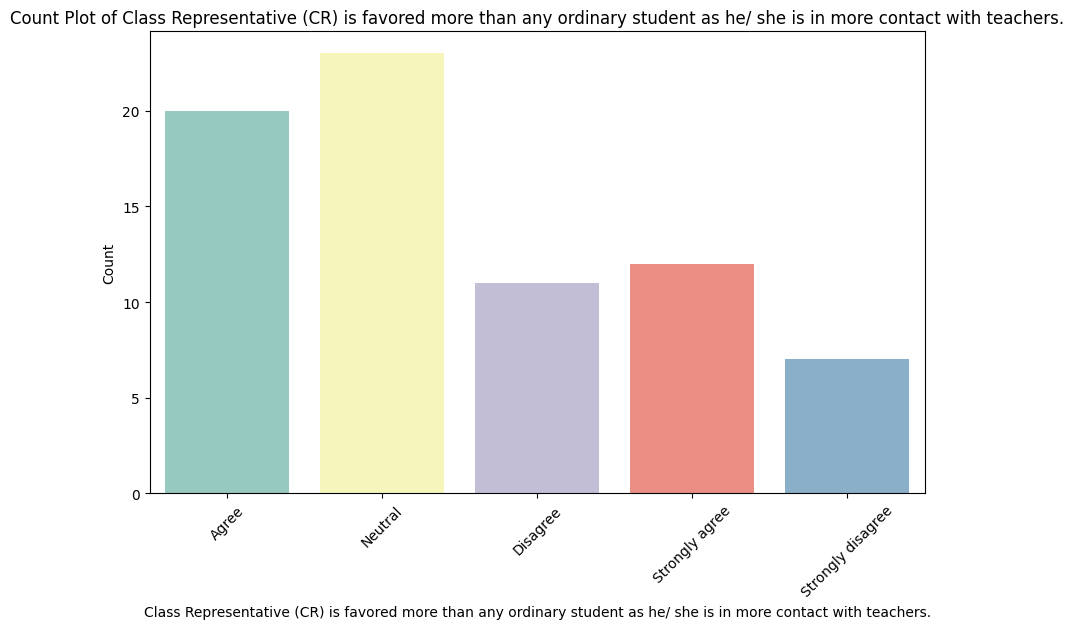

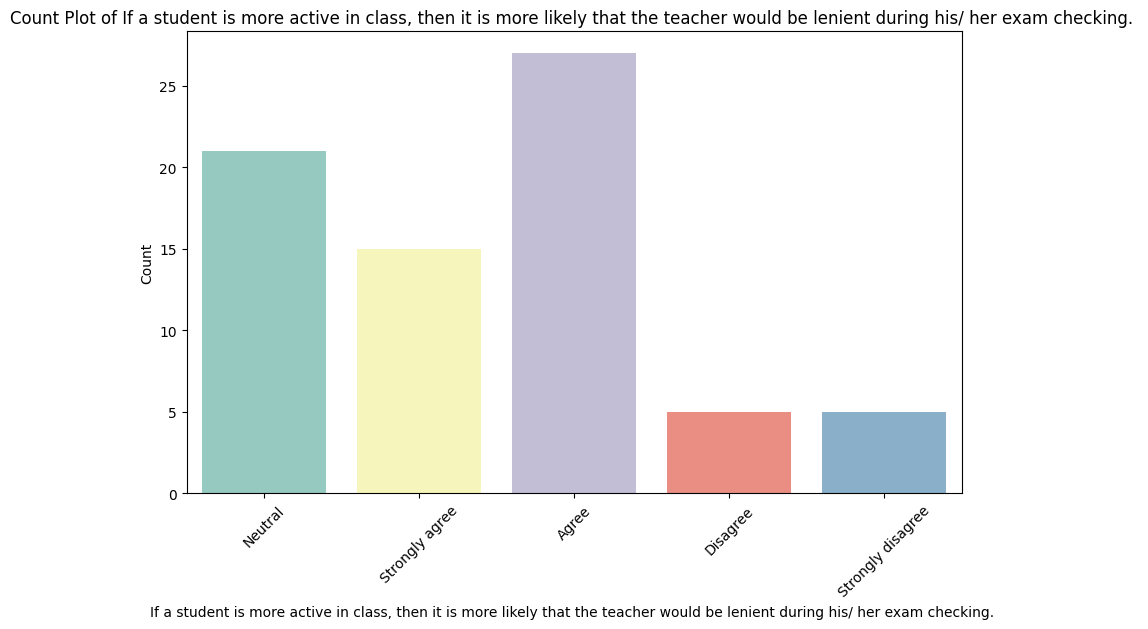

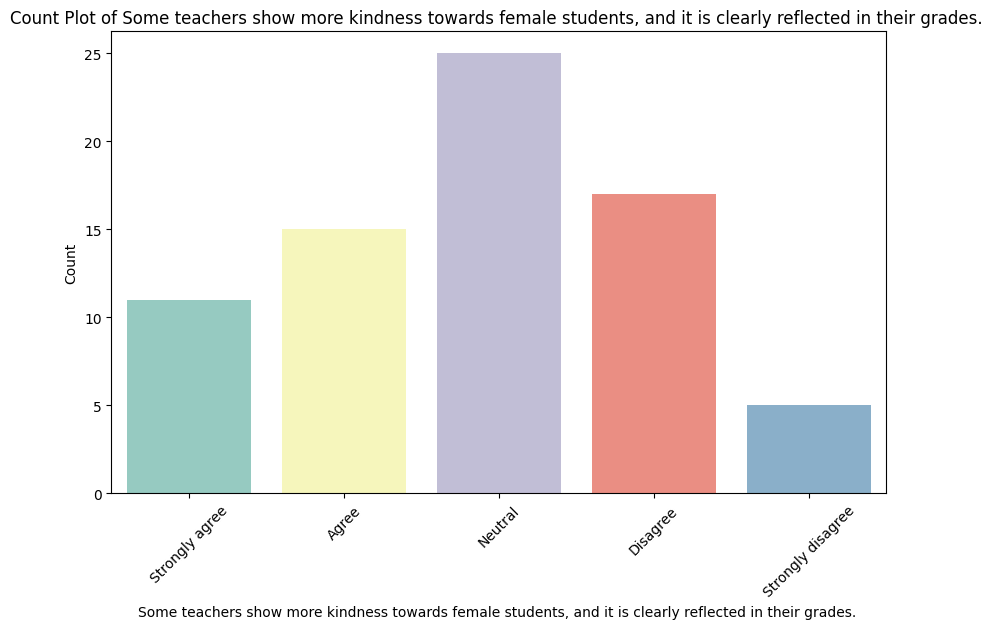

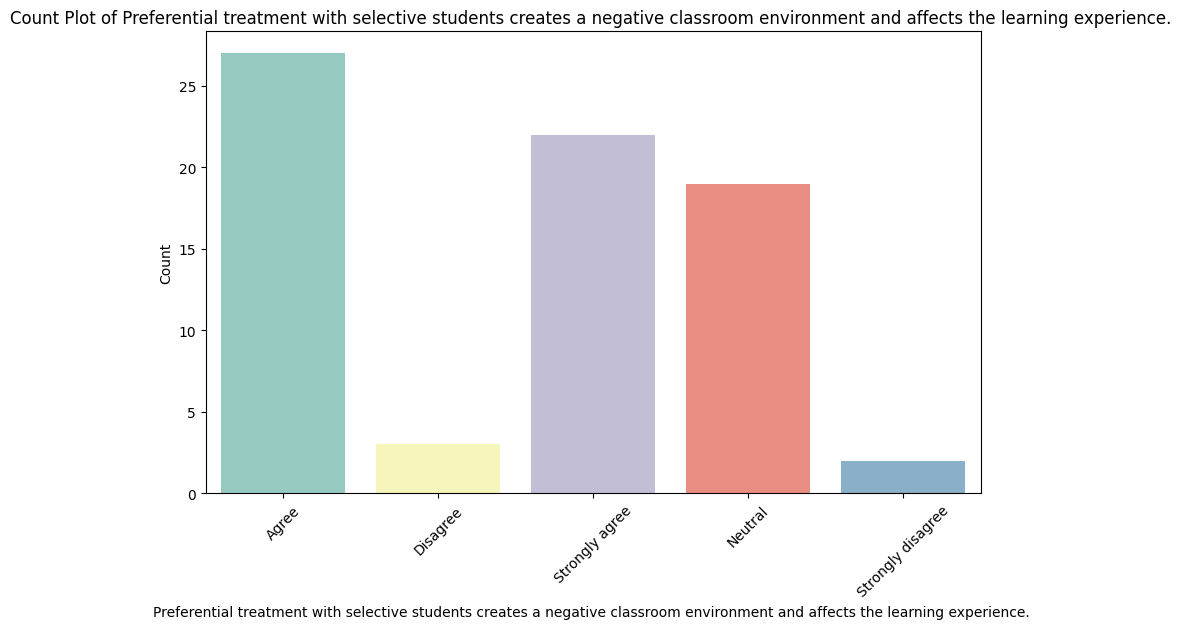

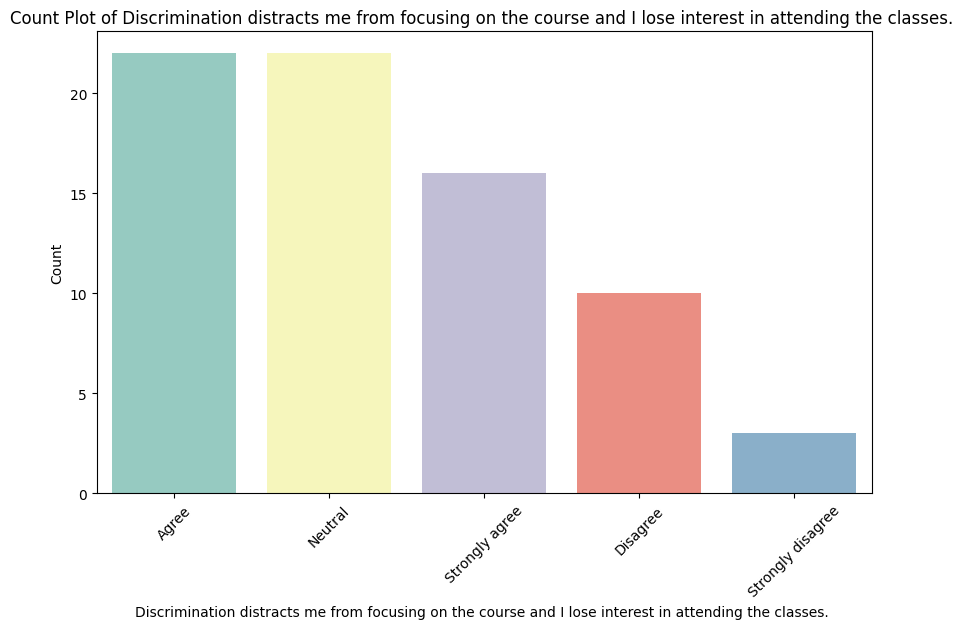

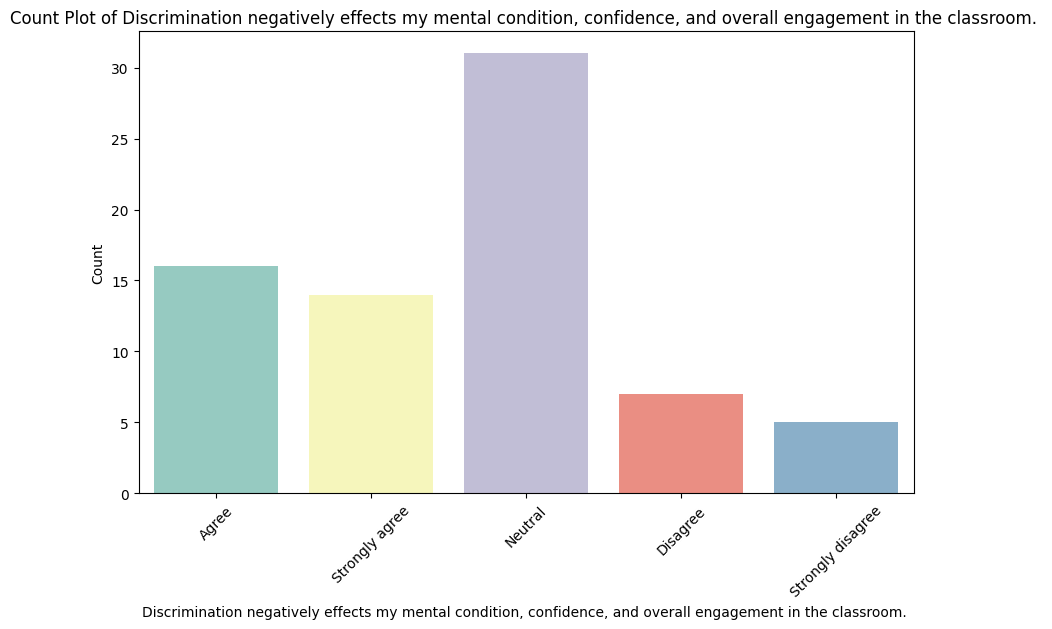

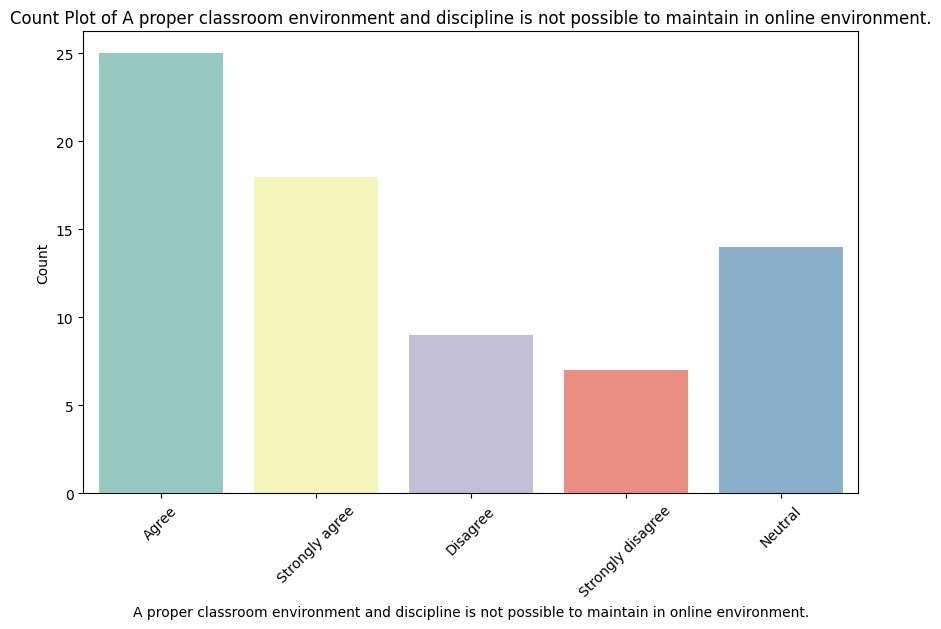

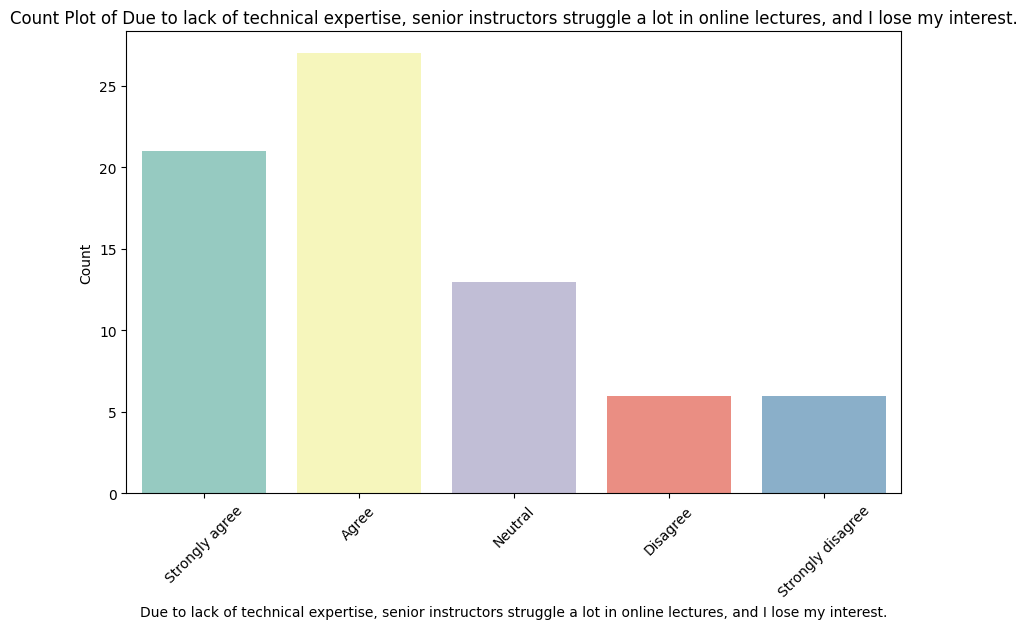

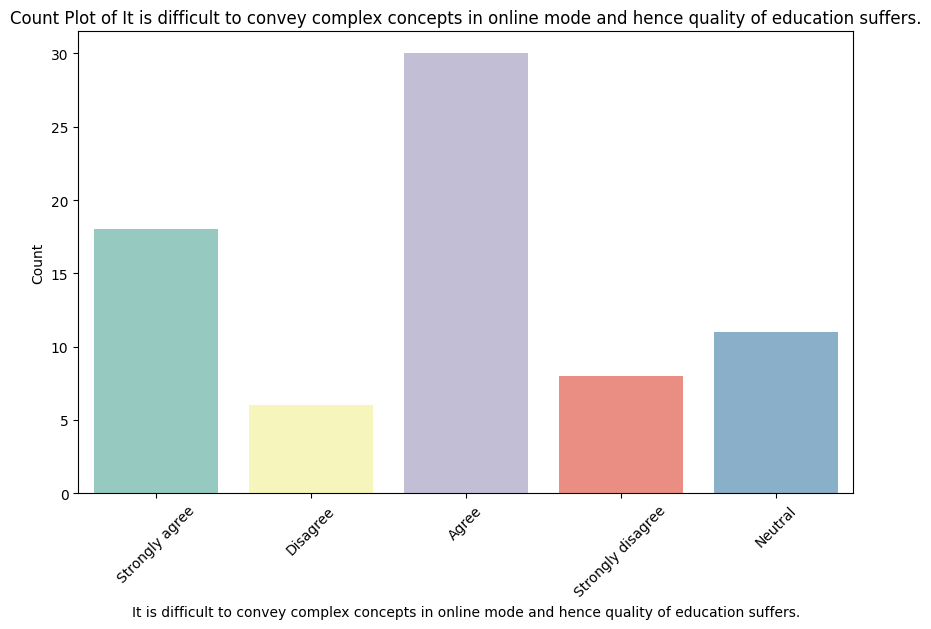

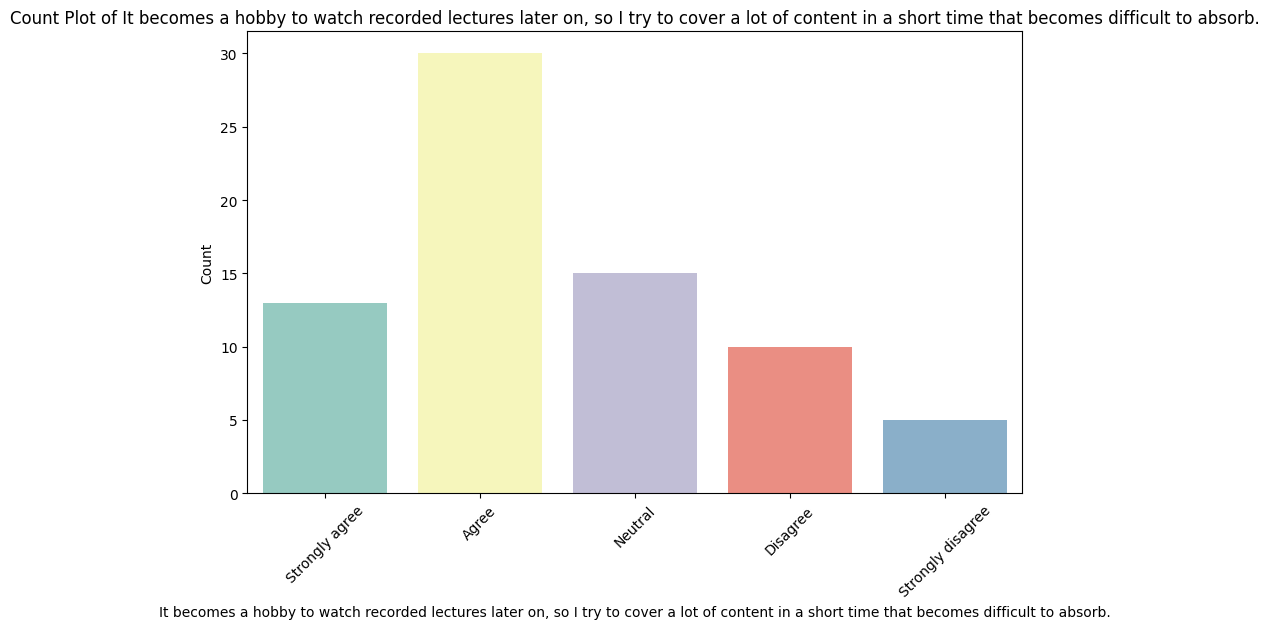

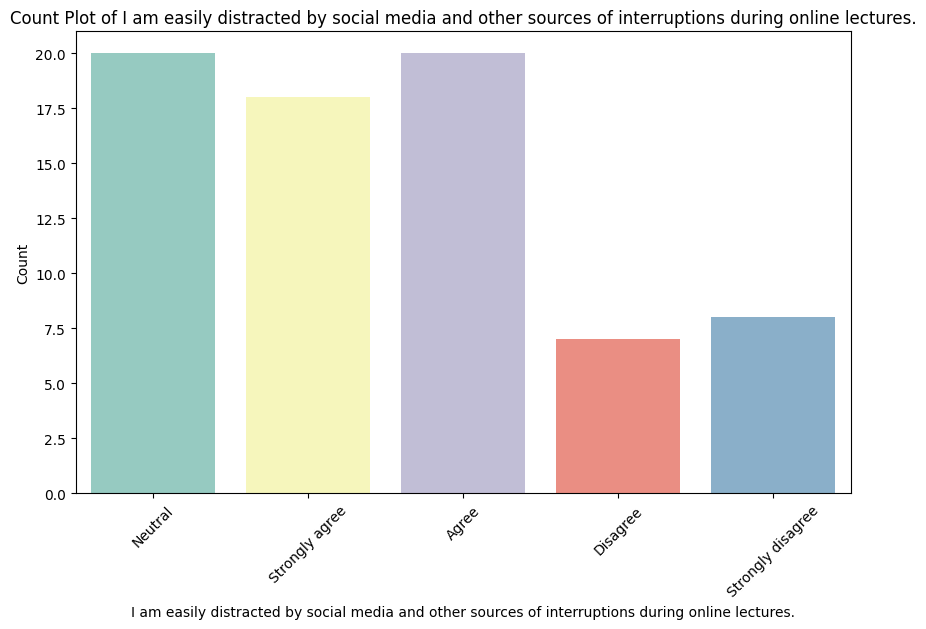

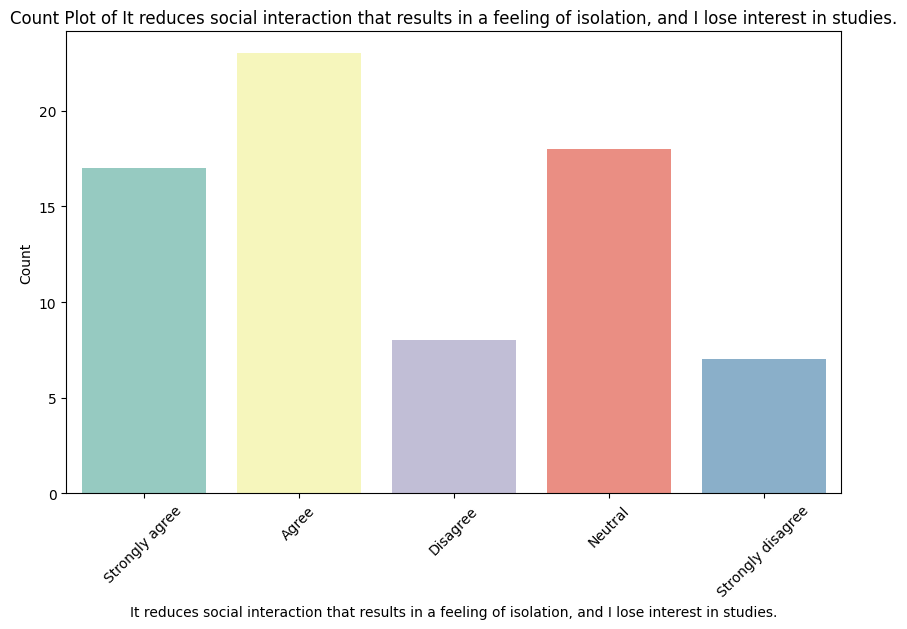

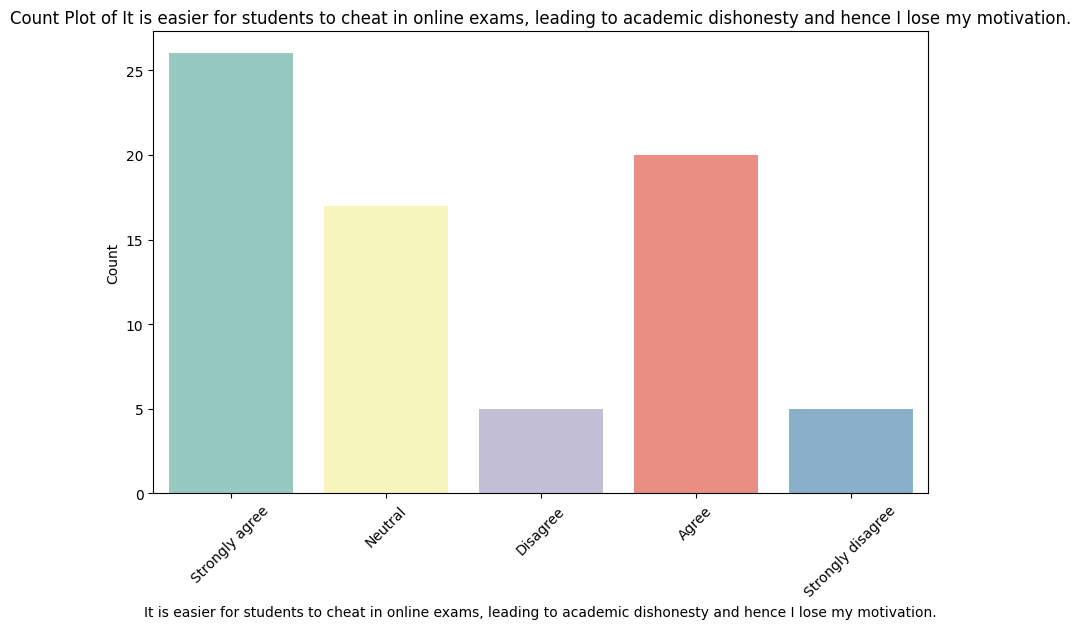

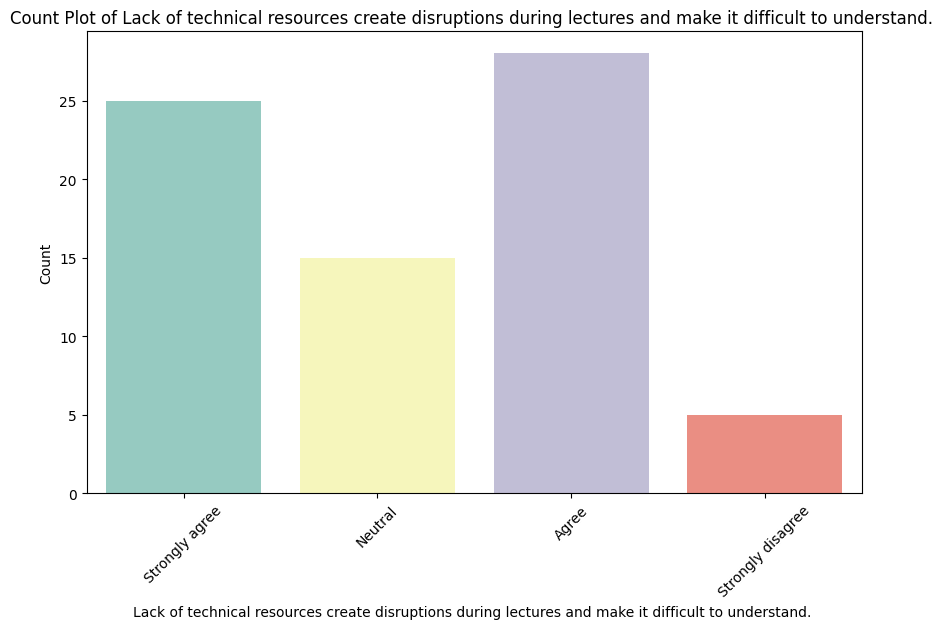

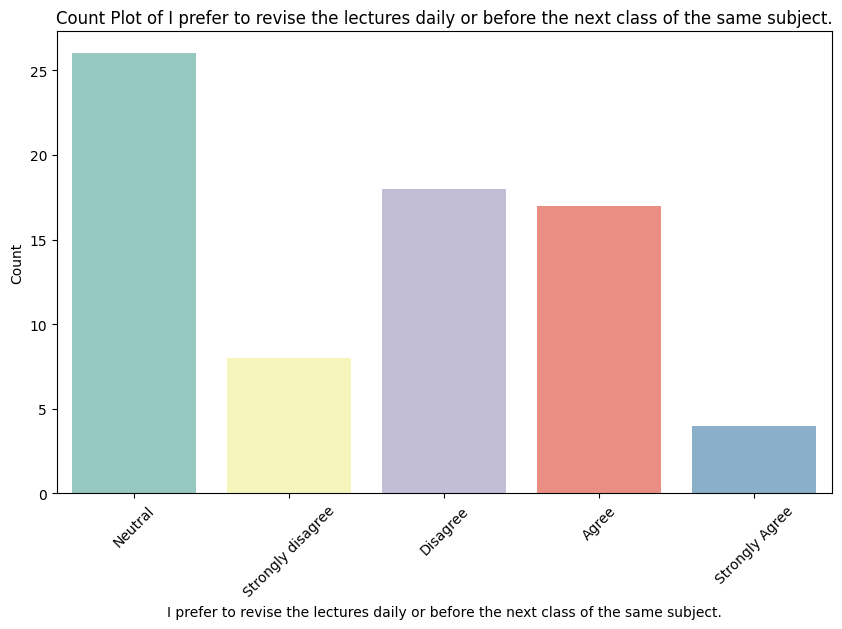

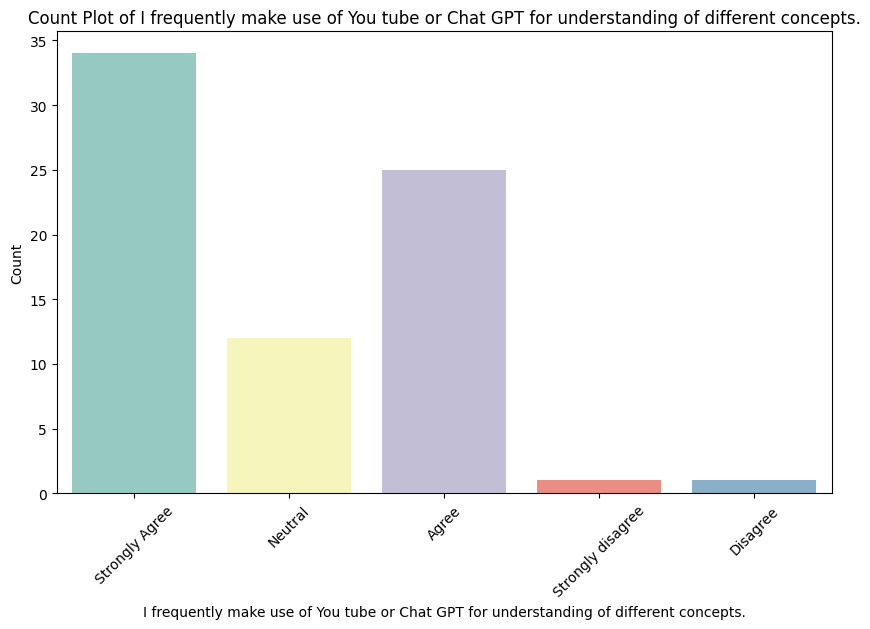

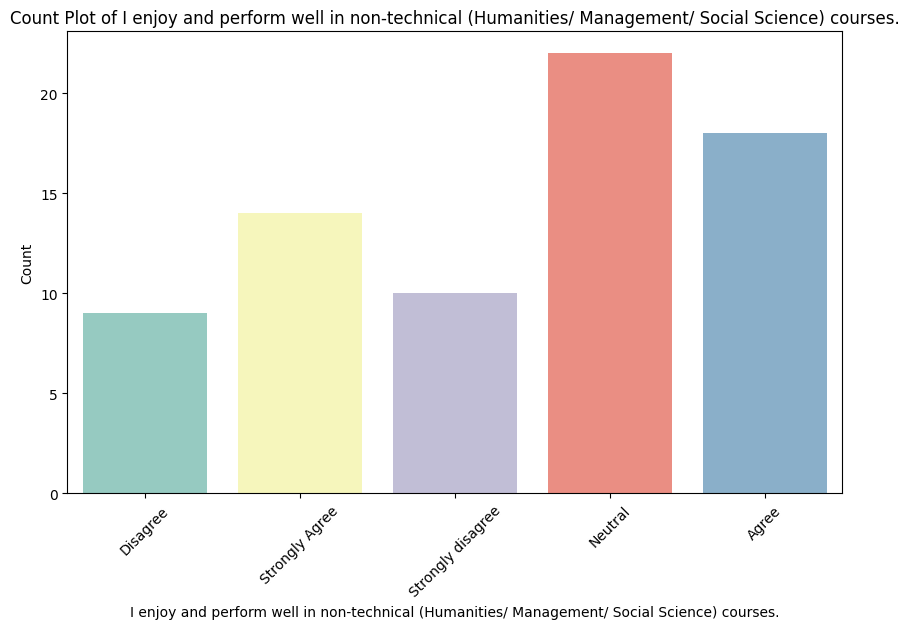

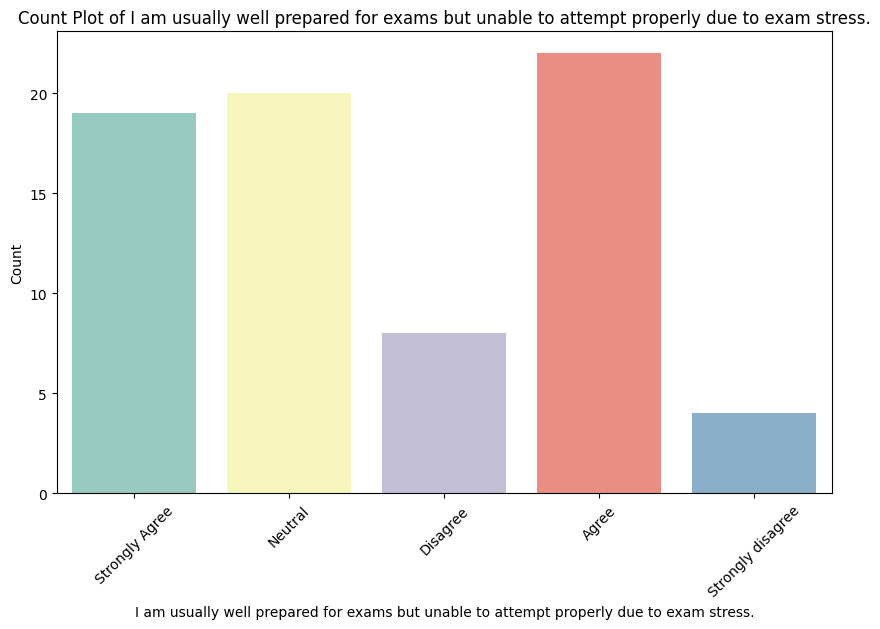

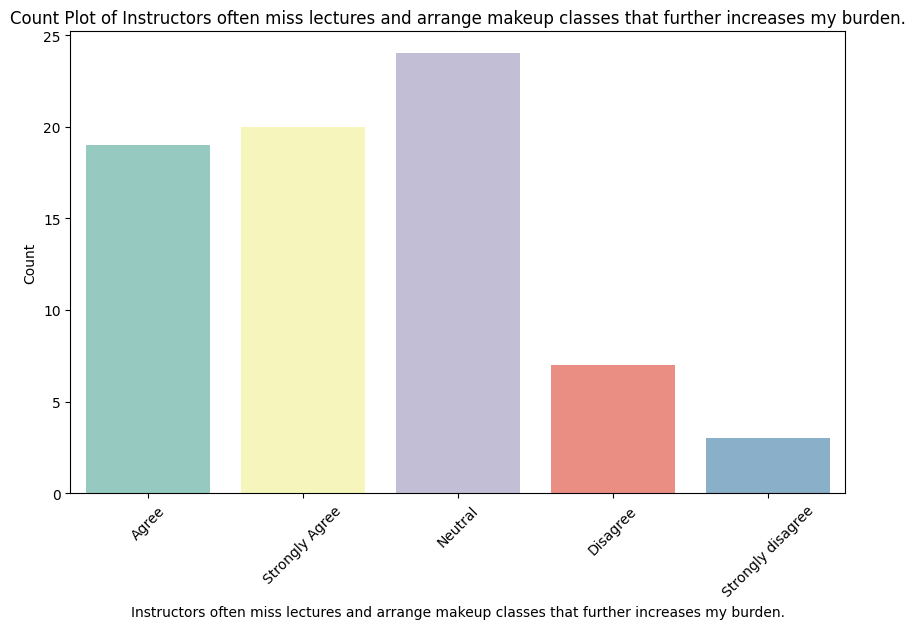

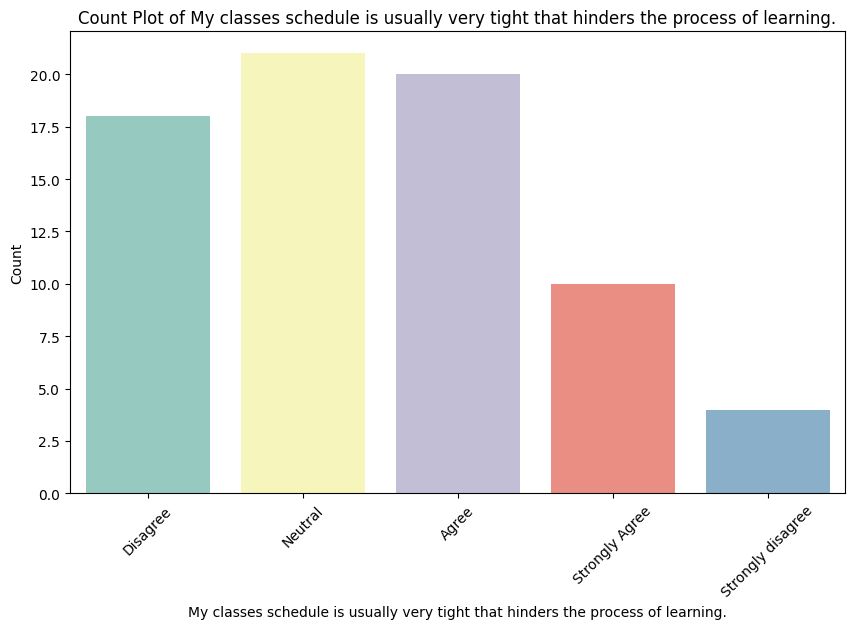

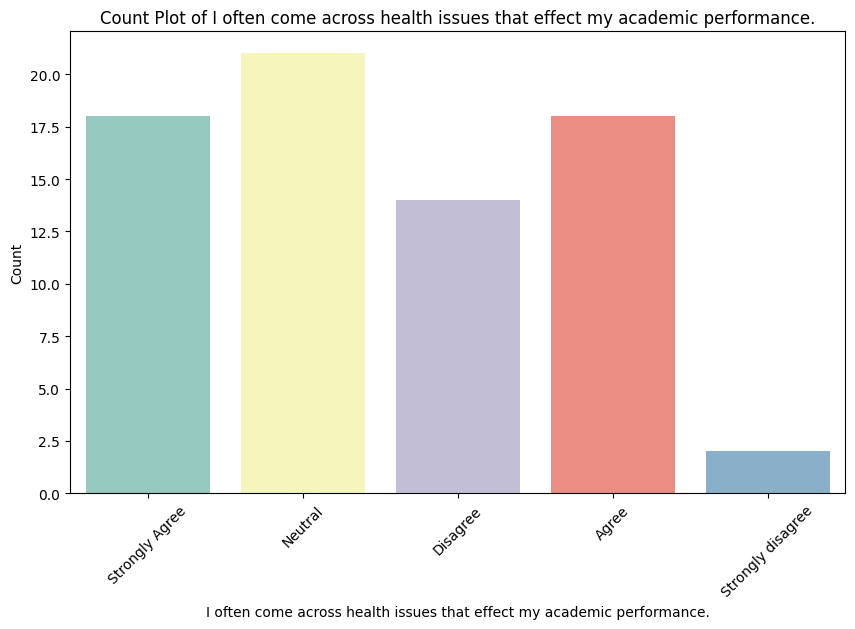

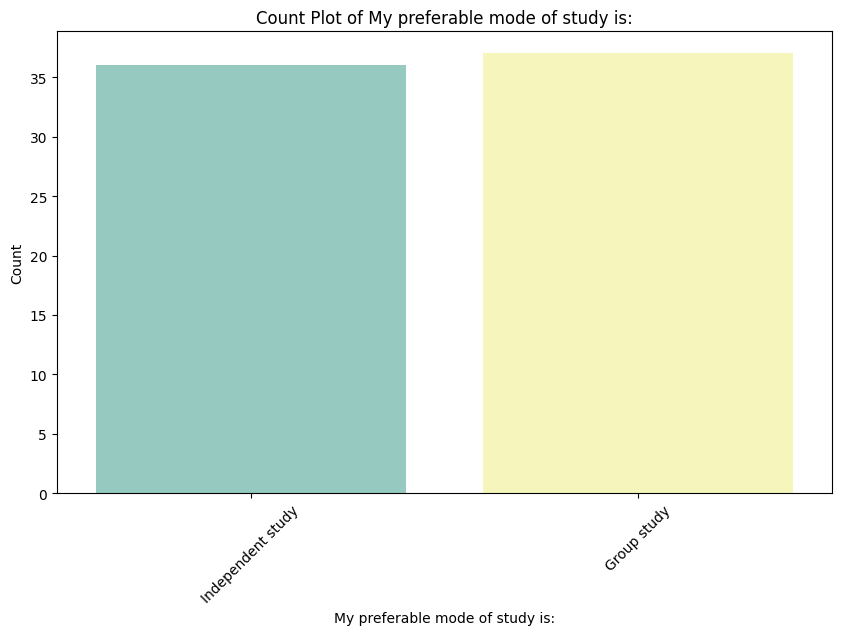

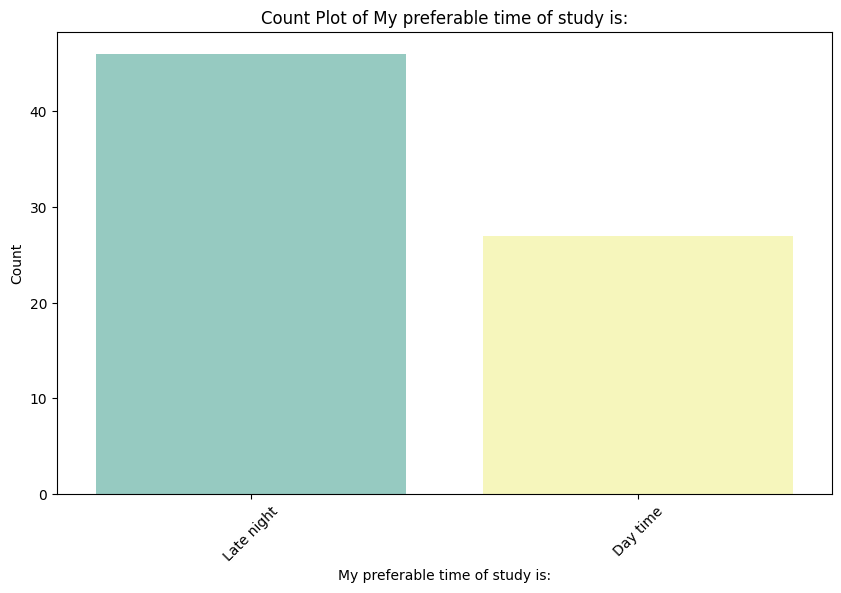

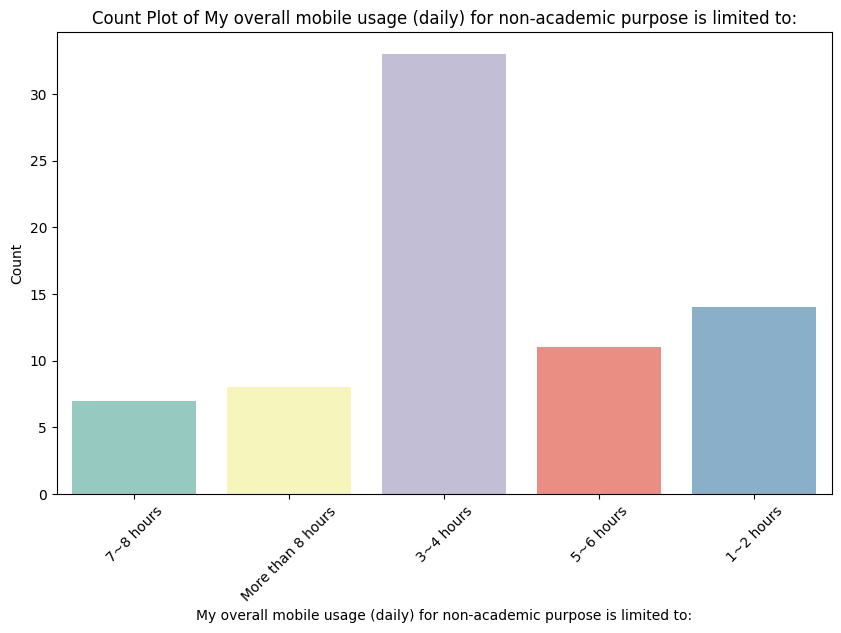

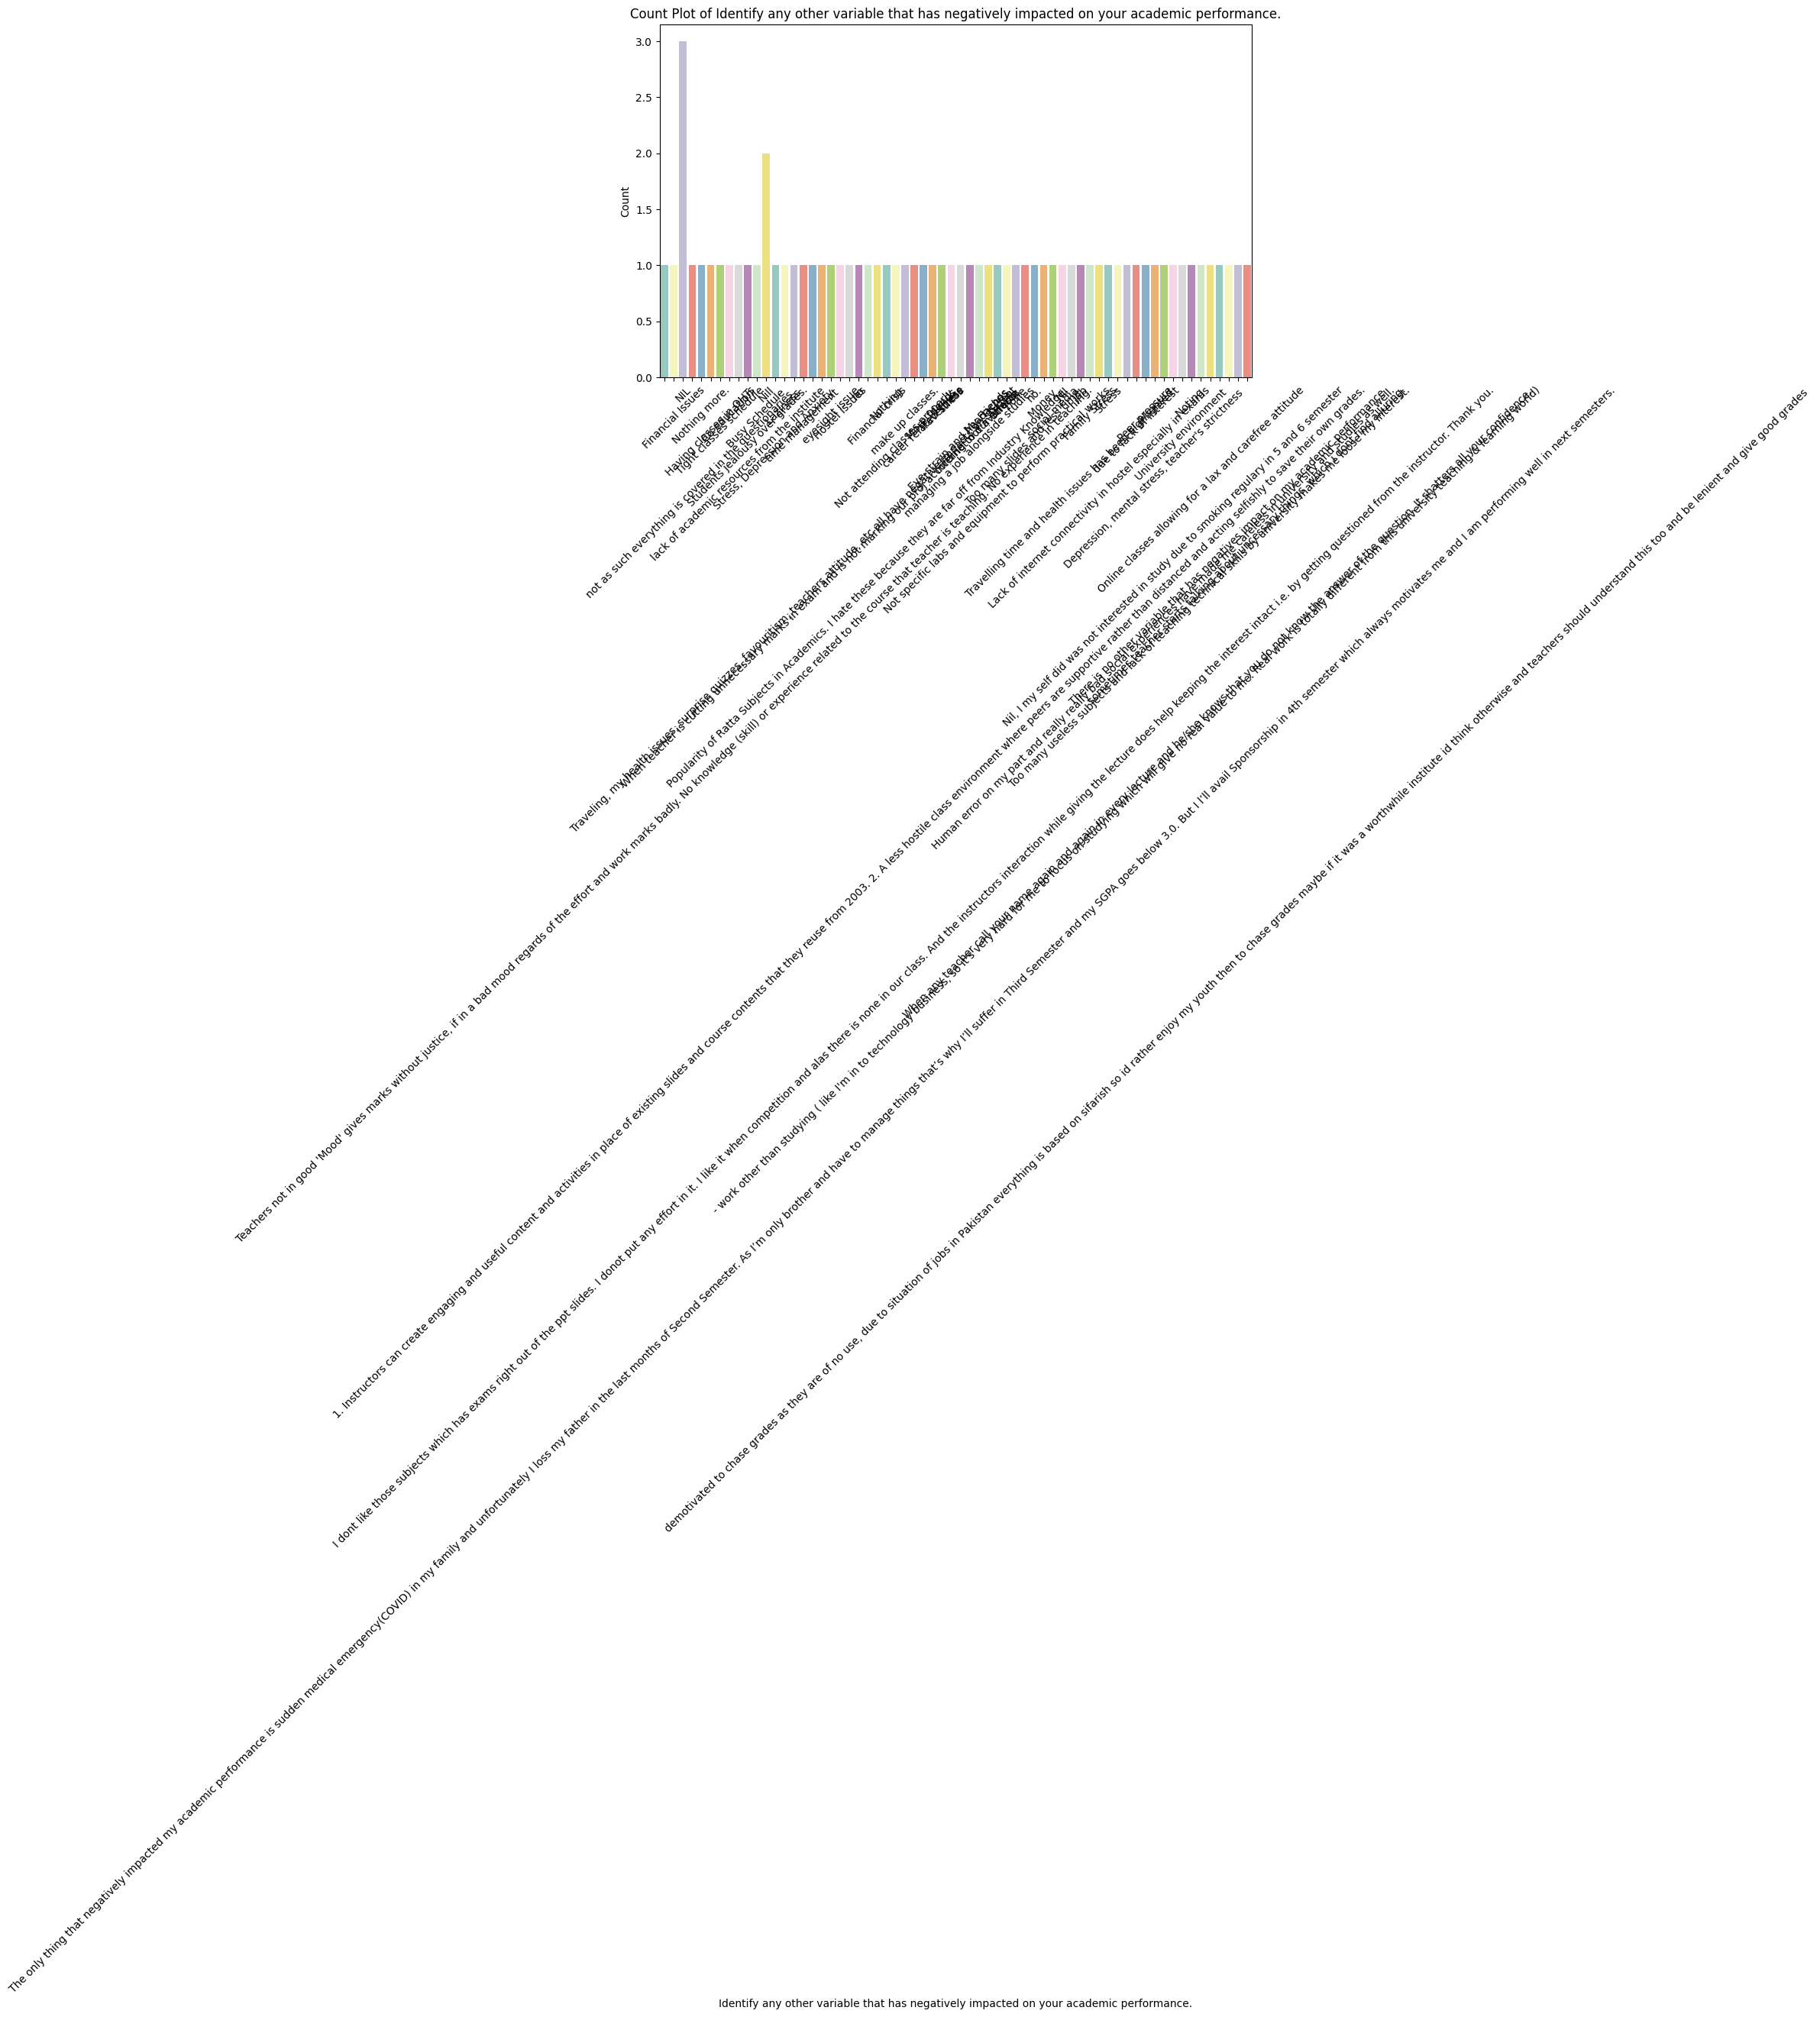

In [25]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create count plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=col, palette='Set3', legend=False)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [32]:
# Group the data by "Gender" and calculate the mean SGPA for each gender
mean_gpa_by_gender = df.groupby('Gender')['SGPA in BS Fifth semester'].mean()

# Display the mean GPAs for each gender
print(mean_gpa_by_gender)


Gender
Female    3.024211
Male      2.755926
Name: SGPA in BS Fifth semester, dtype: float64


In [33]:
# Define the semester columns (modify these as needed)
semester_columns = ['SGPA in BS First semester', 'SGPA in BS Second semester', 'SGPA in BS Third semester', 'SGPA in BS Fourth semester', 'SGPA in BS Fifth semester']

# Create an empty DataFrame to store the results
mean_gpas_by_semester = pd.DataFrame()

# Calculate the mean SGPA for each semester and store it in the DataFrame
for semester in semester_columns:
    mean_gpas_by_semester[semester] = df.groupby('Gender')[semester].mean()

# Display the mean GPAs for each semester by gender
print(mean_gpas_by_semester)


        SGPA in BS First semester  SGPA in BS Second semester  \
Gender                                                          
Female                   3.104737                    2.830000   
Male                     2.969615                    2.612222   

        SGPA in BS Third semester  SGPA in BS Fourth semester  \
Gender                                                          
Female                   2.885263                    2.732105   
Male                     2.801111                    2.662037   

        SGPA in BS Fifth semester  
Gender                             
Female                   3.024211  
Male                     2.755926  


<Figure size 1200x800 with 0 Axes>

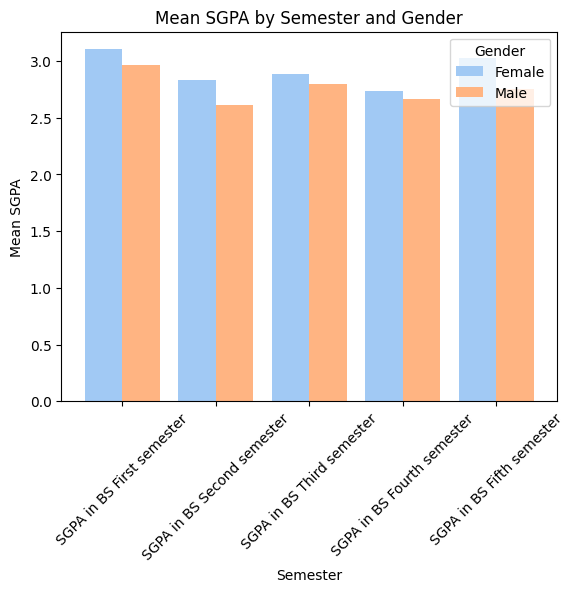

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the semester columns (modify these as needed)
semester_columns = ['SGPA in BS First semester', 'SGPA in BS Second semester', 'SGPA in BS Third semester', 'SGPA in BS Fourth semester', 'SGPA in BS Fifth semester']

# Calculate the mean SGPA for each semester and store it in the DataFrame
mean_gpas_by_semester = pd.DataFrame()

for semester in semester_columns:
    mean_gpas_by_semester[semester] = df.groupby('Gender')[semester].mean()

# Transpose the DataFrame for easier plotting
mean_gpas_by_semester = mean_gpas_by_semester.T

# Set a pleasing color palette
colors = sns.color_palette("pastel")

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
mean_gpas_by_semester.plot(kind='bar', color=colors, width=0.8)
plt.xlabel('Semester')
plt.ylabel('Mean SGPA')
plt.title('Mean SGPA by Semester and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


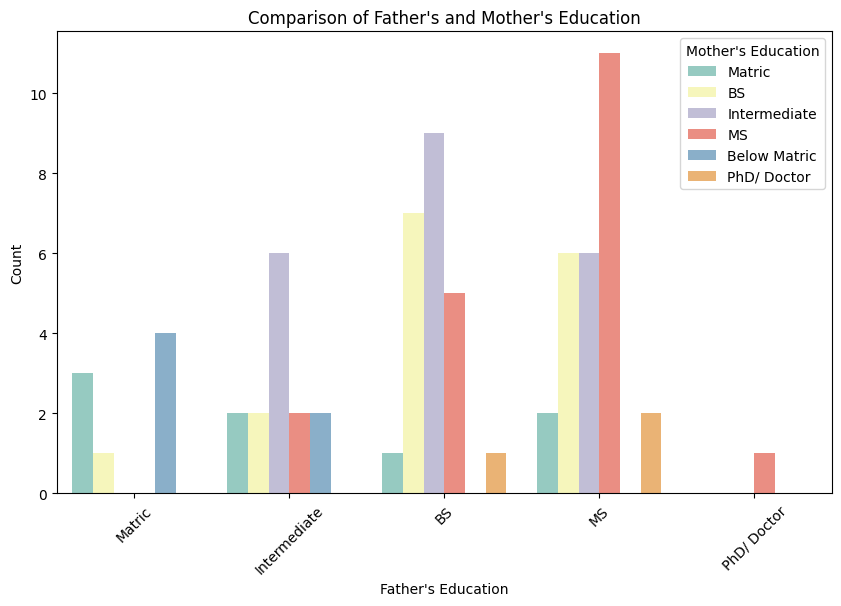

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for comparison
education_comparison = df[['Father\'s Education', 'Mother\'s Education']]

# Create a count plot to compare father and mother education
plt.figure(figsize=(10, 6))
sns.countplot(data=education_comparison, x='Father\'s Education', hue='Mother\'s Education', palette='Set3')
plt.xlabel('Father\'s Education')
plt.ylabel('Count')
plt.title('Comparison of Father\'s and Mother\'s Education')
plt.xticks(rotation=45)
plt.legend(title='Mother\'s Education', loc='upper right')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\2862201293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Place of Birth', palette='Set3', order=df['Place of Birth'].value_counts().index)


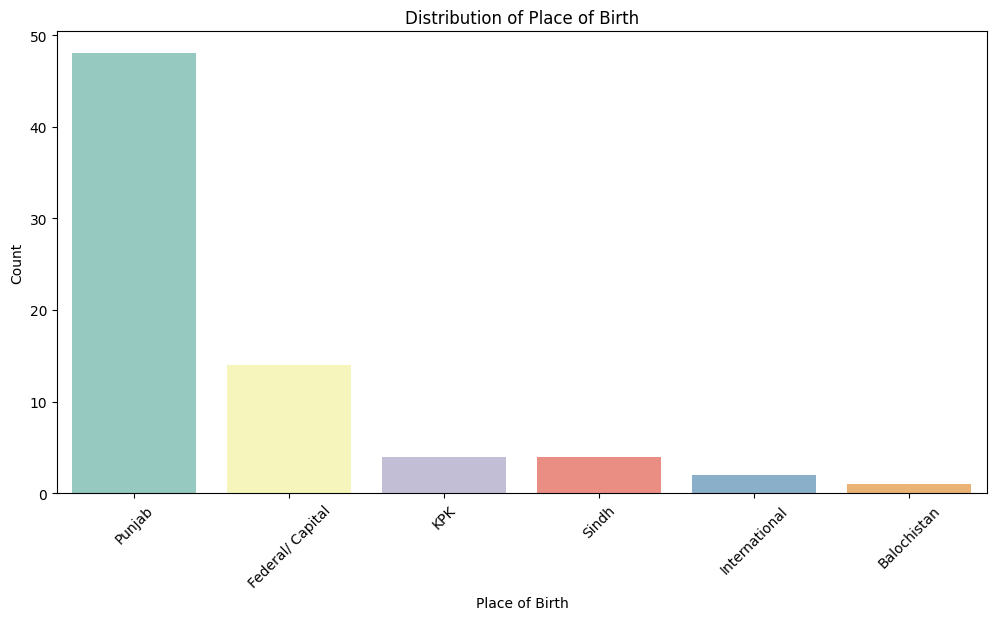

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for "Place of Birth"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Place of Birth', palette='Set3', order=df['Place of Birth'].value_counts().index)
plt.xlabel('Place of Birth')
plt.ylabel('Count')
plt.title('Distribution of Place of Birth')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\404240255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='I understand the lecture more clearly if delivered in:', palette='Set3')


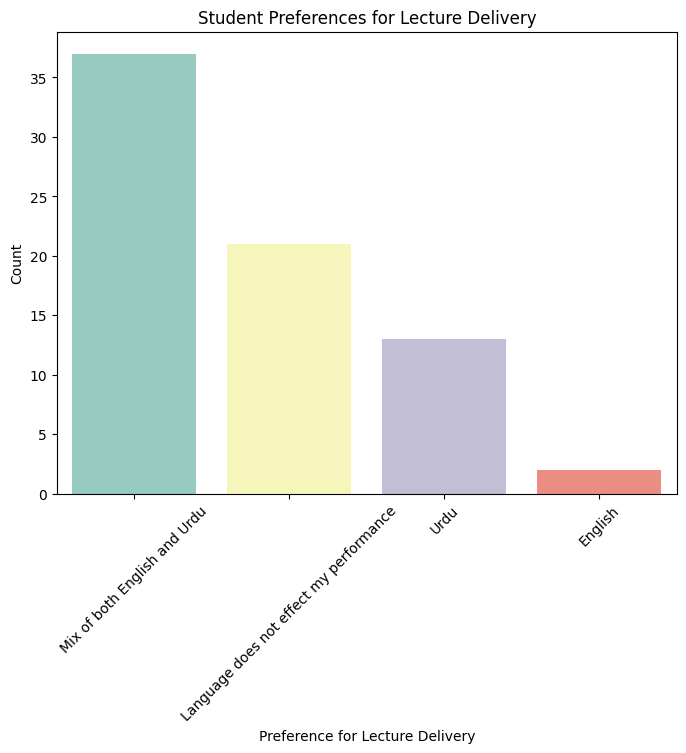

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for "Preferences for Lecture Delivery"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='I understand the lecture more clearly if delivered in:', palette='Set3')
plt.xlabel('Preference for Lecture Delivery')
plt.ylabel('Count')
plt.title('Student Preferences for Lecture Delivery')
plt.xticks(rotation=45)
plt.show()


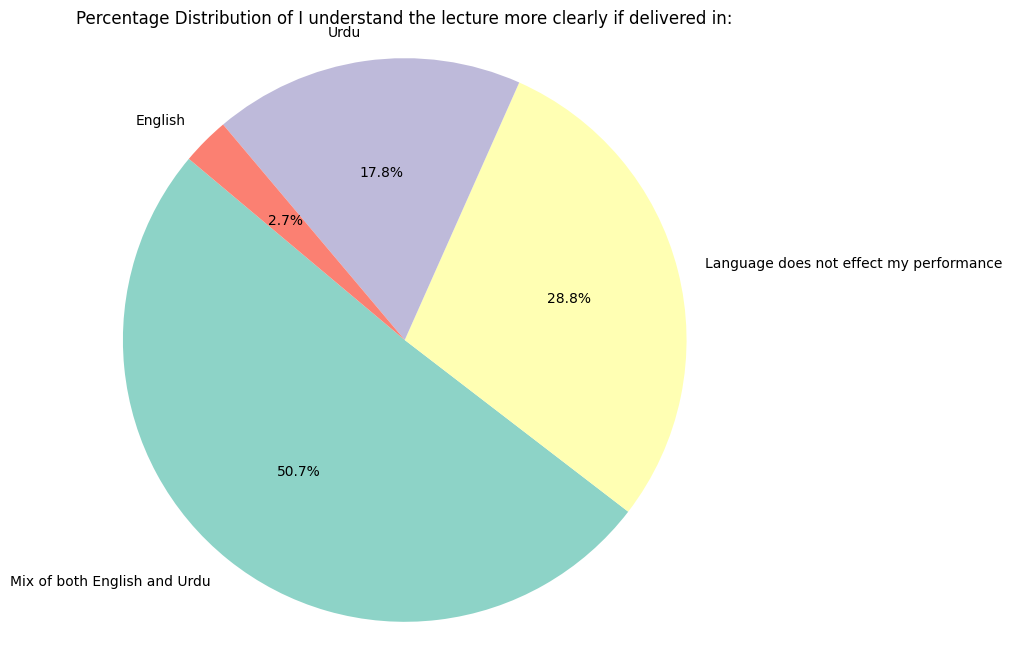

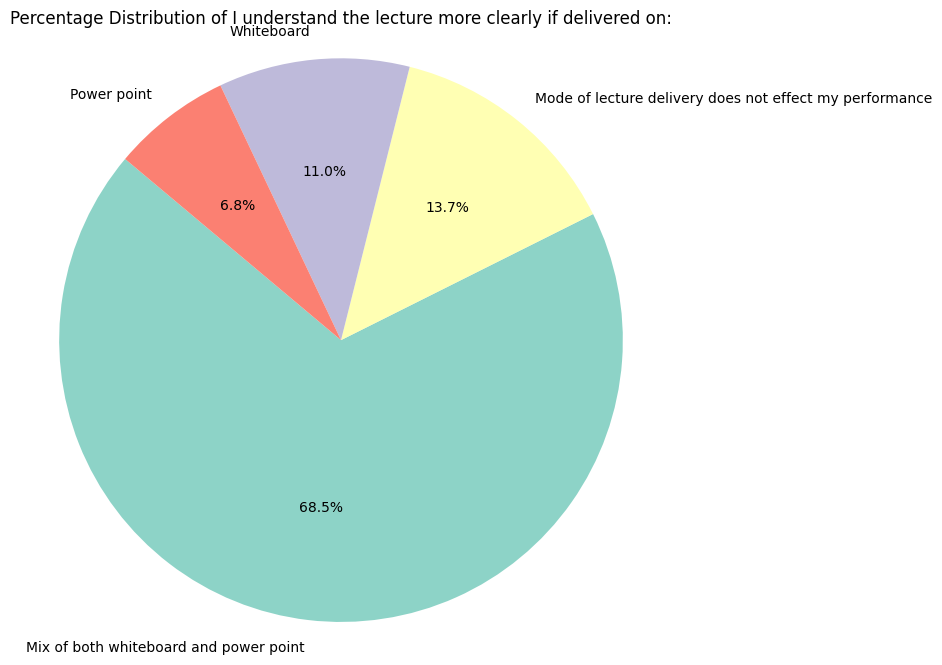

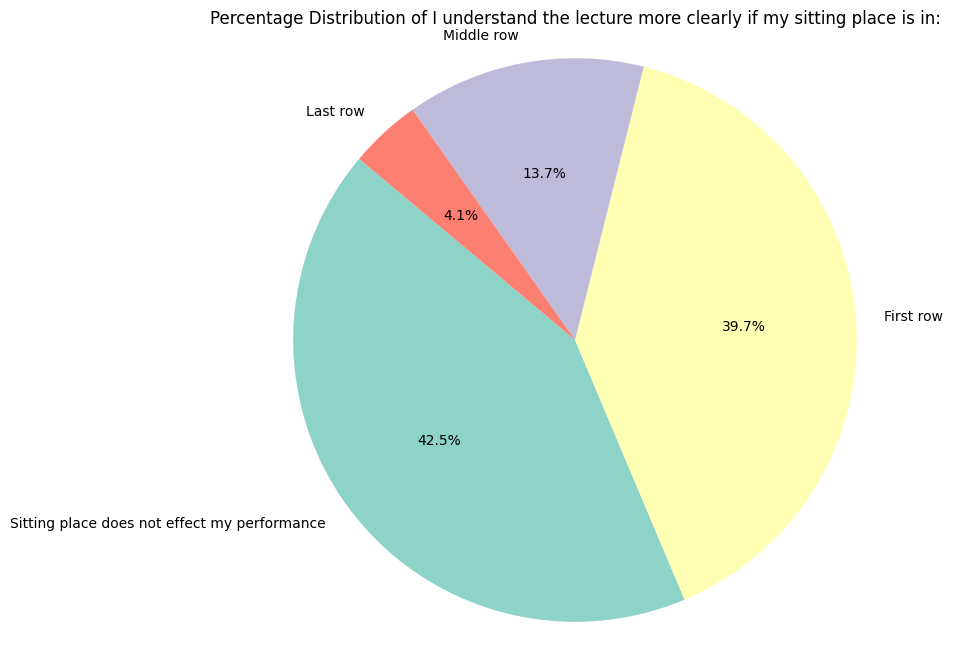

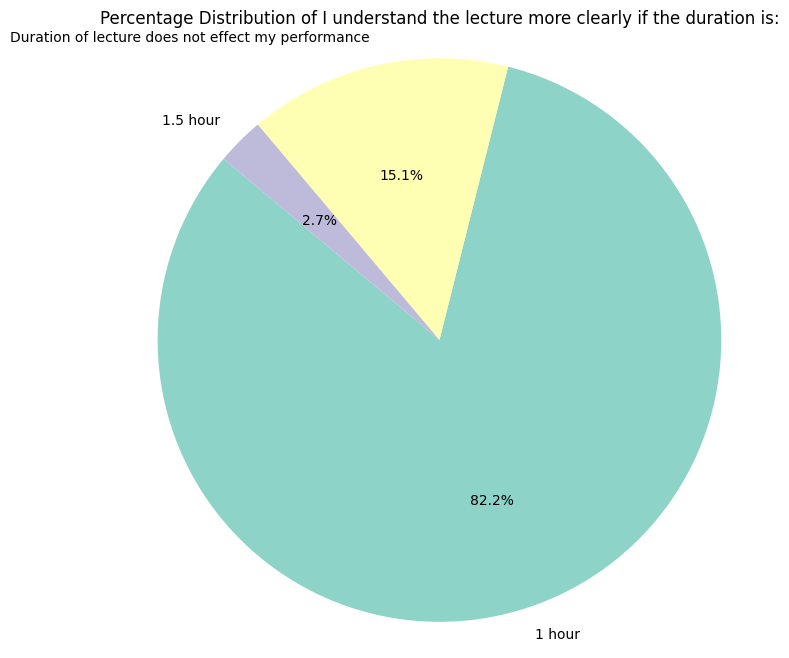

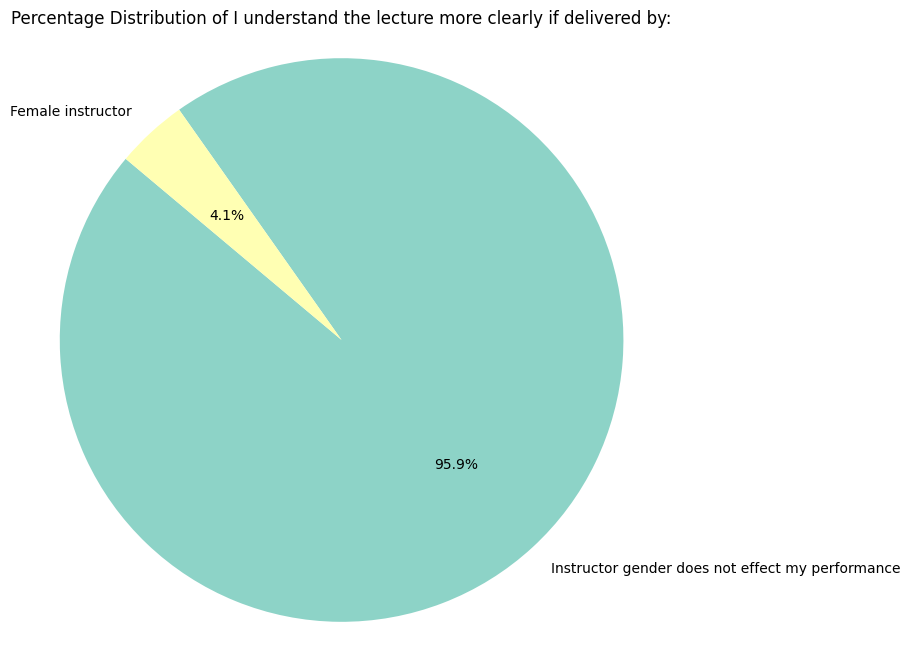

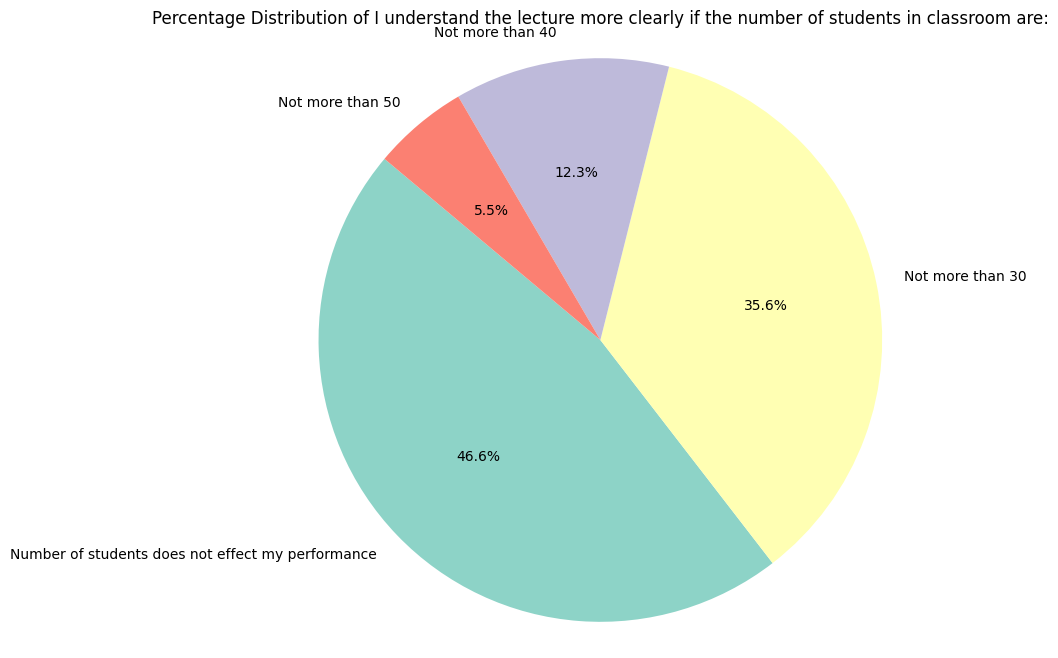

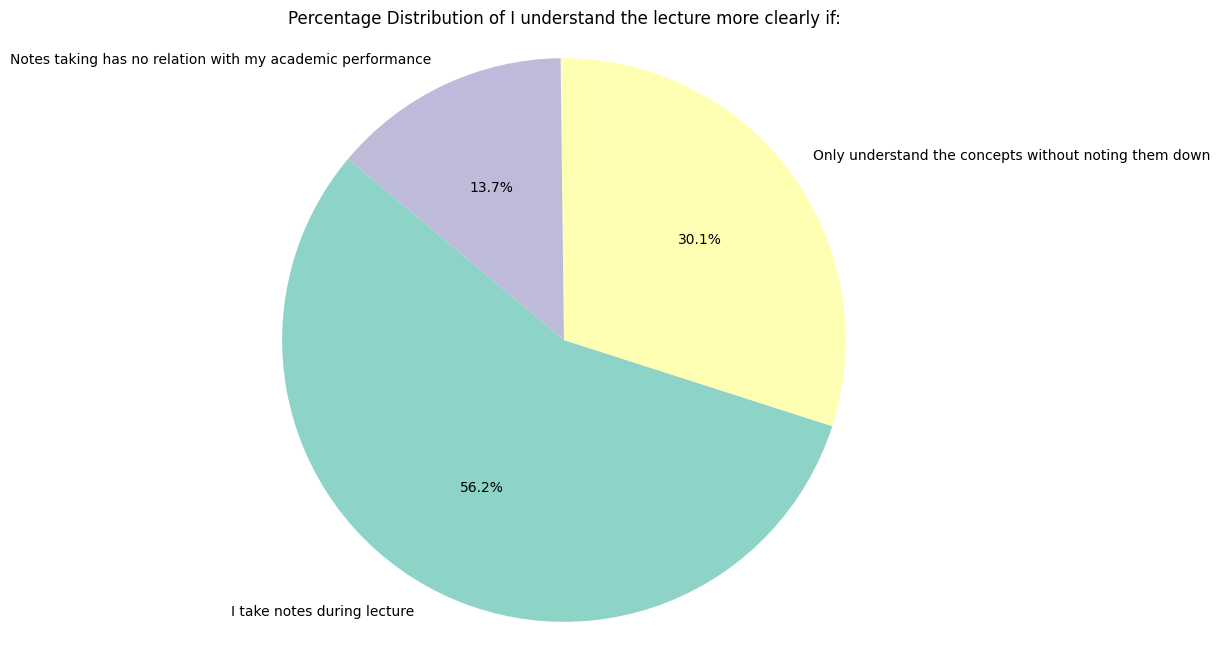

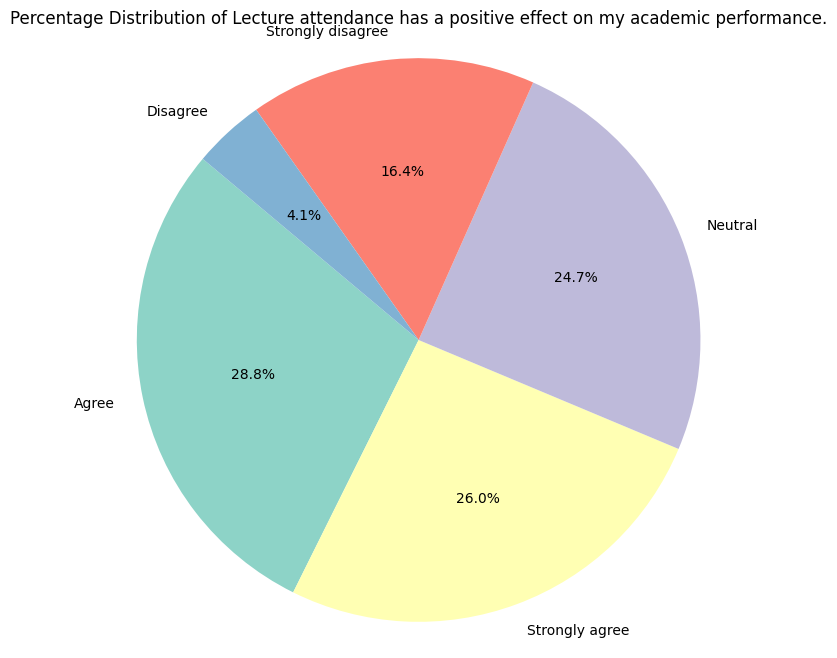

In [38]:
import matplotlib.pyplot as plt

# List of columns to visualize
columns_to_visualize = [
    "I understand the lecture more clearly if delivered in:",
    "I understand the lecture more clearly if delivered on:",
    "I understand the lecture more clearly if my sitting place is in:",
    "I understand the lecture more clearly if the duration is:",
    "I understand the lecture more clearly if delivered by:",
    "I understand the lecture more clearly if the number of students in classroom are:",
    "I understand the lecture more clearly if:",
    "Lecture attendance has a positive effect on my academic performance."
]

# Define a function to create a pie chart for each column
def create_pie_chart(column_name):
    plt.figure(figsize=(8, 8))
    counts = df[column_name].value_counts()
    labels = counts.index
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Percentage Distribution of {column_name}')
    plt.show()

# Create pie charts for each column
for column in columns_to_visualize:
    create_pie_chart(column)


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\4106905428.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='Set3')


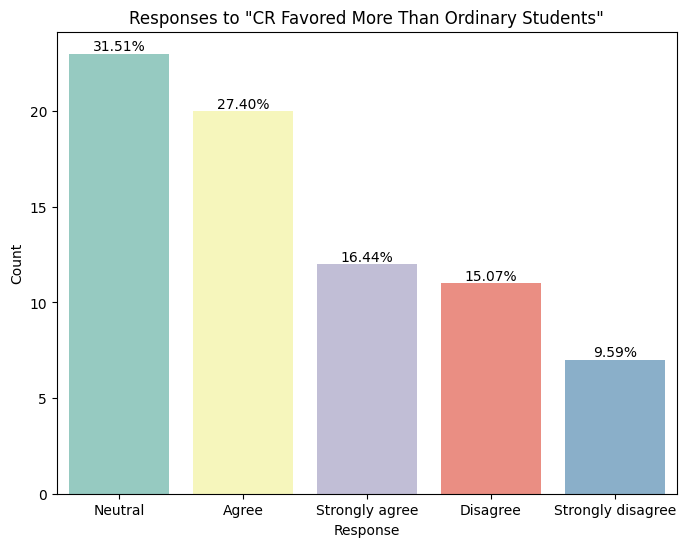

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the responses in the column
counts = df["Class Representative (CR) is favored more than any ordinary student as he/ she is in more contact with teachers."].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts, palette='Set3')

# Display percentages on top of the bars
total_count = len(df)
for i, count in enumerate(counts):
    plt.text(i, count, f'{count/total_count*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Responses to "CR Favored More Than Ordinary Students"')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\882690842.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='What is your residence place?', palette='Set3')


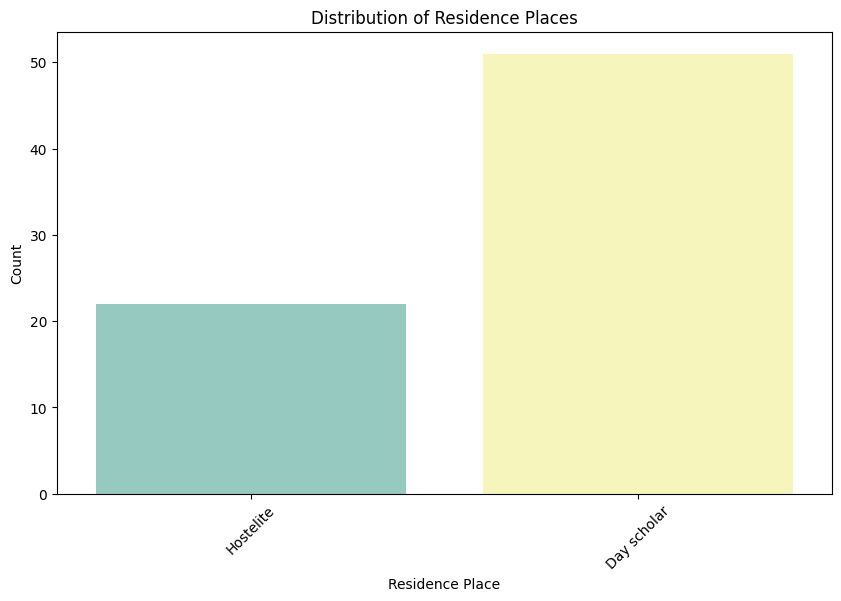

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for "What is your residence place?"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='What is your residence place?', palette='Set3')
plt.xlabel('Residence Place')
plt.ylabel('Count')
plt.title('Distribution of Residence Places')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\1312746363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Due to class/ lab cancellation or roads blockage, lots of time get wasted due to fixed official transport timings.", palette='Set3')


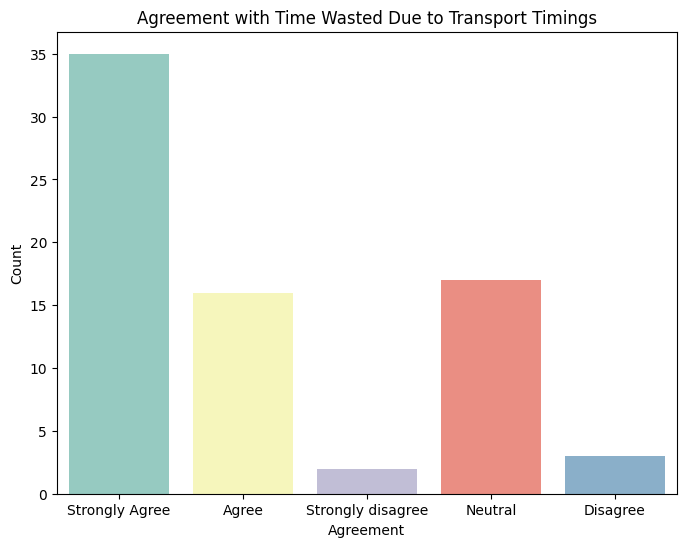

In [46]:
# Create a bar plot for the statement "Due to class/ lab cancellation or roads blockage..."
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Due to class/ lab cancellation or roads blockage, lots of time get wasted due to fixed official transport timings.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Time Wasted Due to Transport Timings')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\2253957189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hostelite can be more focused towards their studies whereas a day scholar may have a lot of distractions due to family issues.", palette='Set3')


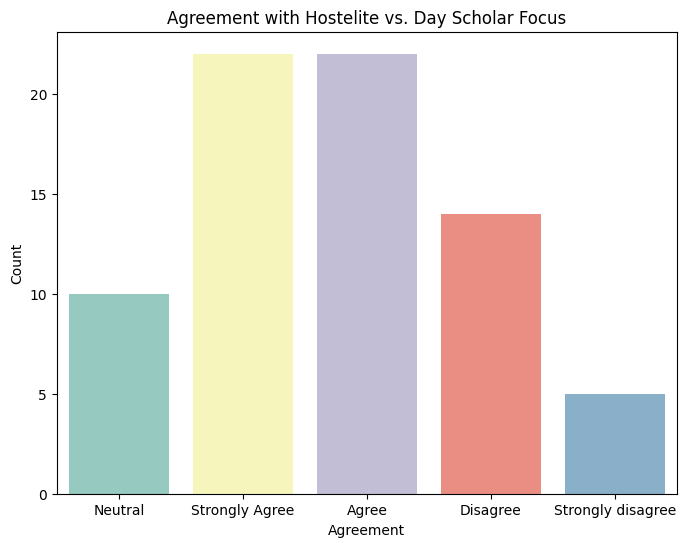

In [47]:
# Create a bar plot for the statement "Hostelite can be more focused towards their studies..."
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Hostelite can be more focused towards their studies whereas a day scholar may have a lot of distractions due to family issues.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Hostelite vs. Day Scholar Focus')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\4051447458.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Un-announced quizzes are quite stressful and cause unnecessary anxiety and pressure on students.", palette='Set3')


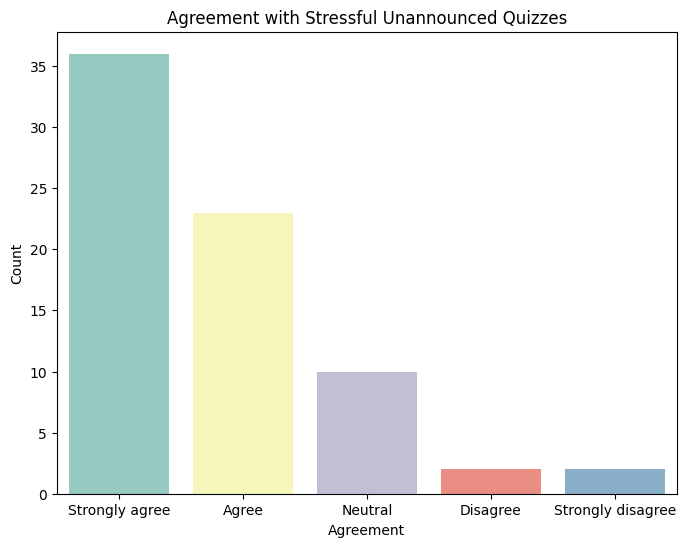

In [48]:
# Create a bar plot for the statement "Un-announced quizzes are quite stressful..."
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Un-announced quizzes are quite stressful and cause unnecessary anxiety and pressure on students.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Stressful Unannounced Quizzes')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\1018677670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="I am not usually prepared for surprise quizzes and hence these are not true measures of my knowledge and understandings.", palette='Set3')


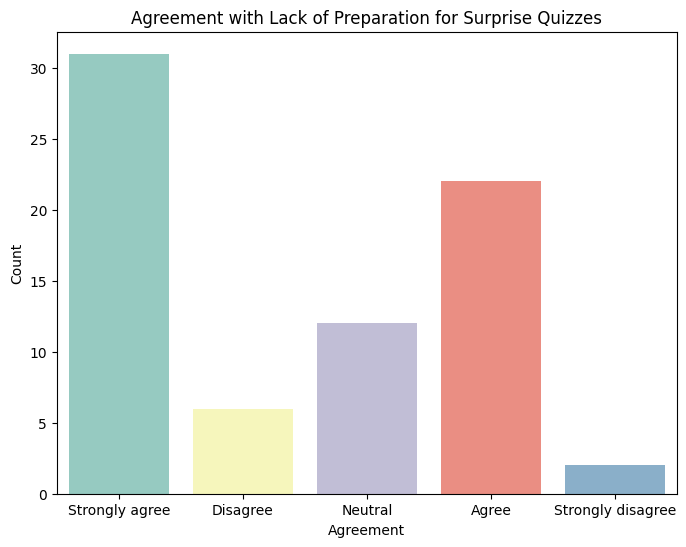

In [50]:
# Create a bar plot for the statement "I am not usually prepared for surprise quizzes..."
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="I am not usually prepared for surprise quizzes and hence these are not true measures of my knowledge and understandings.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Lack of Preparation for Surprise Quizzes')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\2395507615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="I prefer to revise the lectures daily or before the next class of the same subject.", palette='Set3')


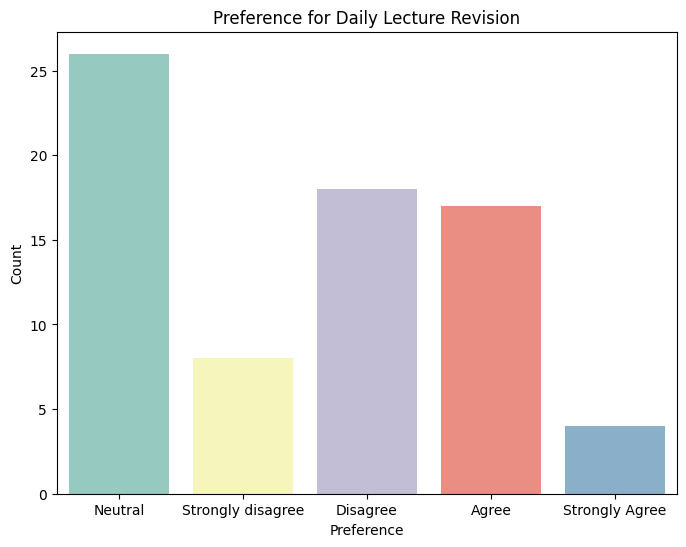

In [51]:
# Create a bar plot for the preference of revising lectures daily
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="I prefer to revise the lectures daily or before the next class of the same subject.", palette='Set3')
plt.xlabel('Preference')
plt.ylabel('Count')
plt.title('Preference for Daily Lecture Revision')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\2776419394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="I frequently make use of You tube or Chat GPT for understanding of different concepts.", palette='Set3')


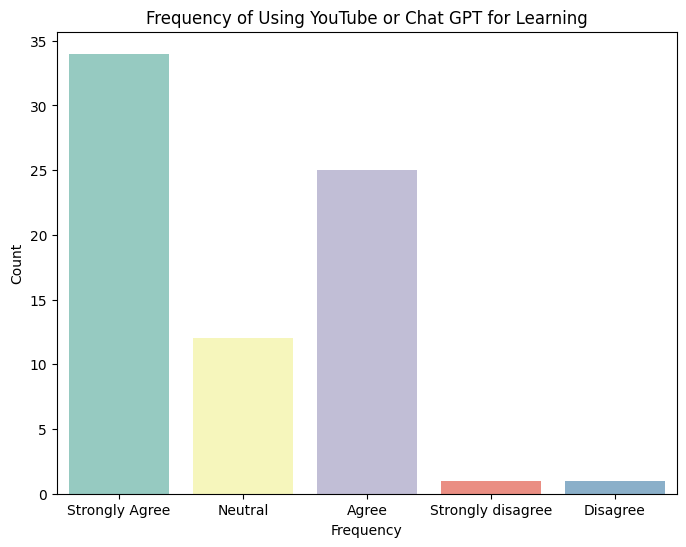

In [52]:
# Create a bar plot for the frequency of using YouTube or Chat GPT for understanding concepts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="I frequently make use of You tube or Chat GPT for understanding of different concepts.", palette='Set3')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency of Using YouTube or Chat GPT for Learning')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\198497442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="I enjoy and perform well in non-technical (Humanities/ Management/ Social Science) courses.", palette='Set3')


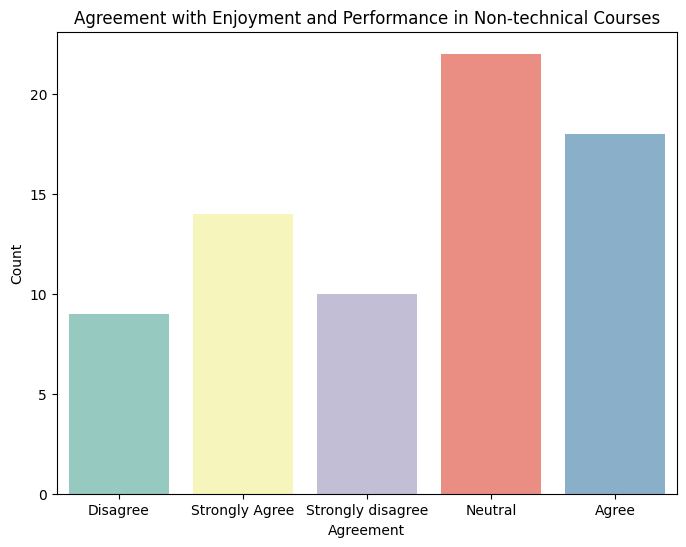

In [53]:
# Create a bar plot for the enjoyment and performance in non-technical courses
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="I enjoy and perform well in non-technical (Humanities/ Management/ Social Science) courses.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Enjoyment and Performance in Non-technical Courses')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\4207256467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="I am usually well prepared for exams but unable to attempt properly due to exam stress.", palette='Set3')


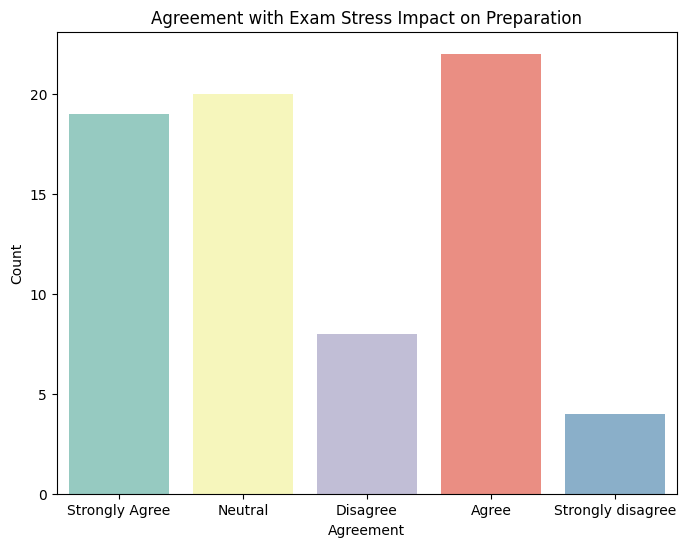

In [54]:
# Create a bar plot for the statement "I am usually well prepared for exams but unable to attempt properly due to exam stress."
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="I am usually well prepared for exams but unable to attempt properly due to exam stress.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Exam Stress Impact on Preparation')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\1135672407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="My classes schedule is usually very tight that hinders the process of learning.", palette='Set3')


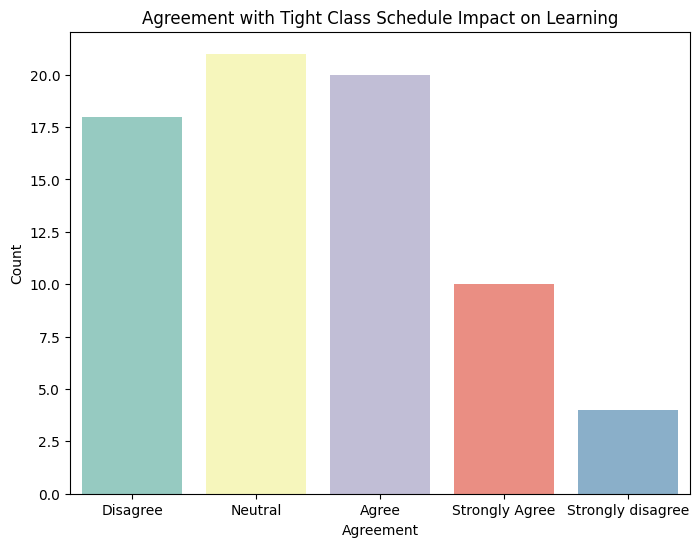

In [55]:
# Create a bar plot for the statement "My class schedule is usually very tight, which hinders the process of learning."
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="My classes schedule is usually very tight that hinders the process of learning.", palette='Set3')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.title('Agreement with Tight Class Schedule Impact on Learning')
plt.xticks(rotation=0)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\3408256000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="My preferable mode of study is:", palette='Set3')


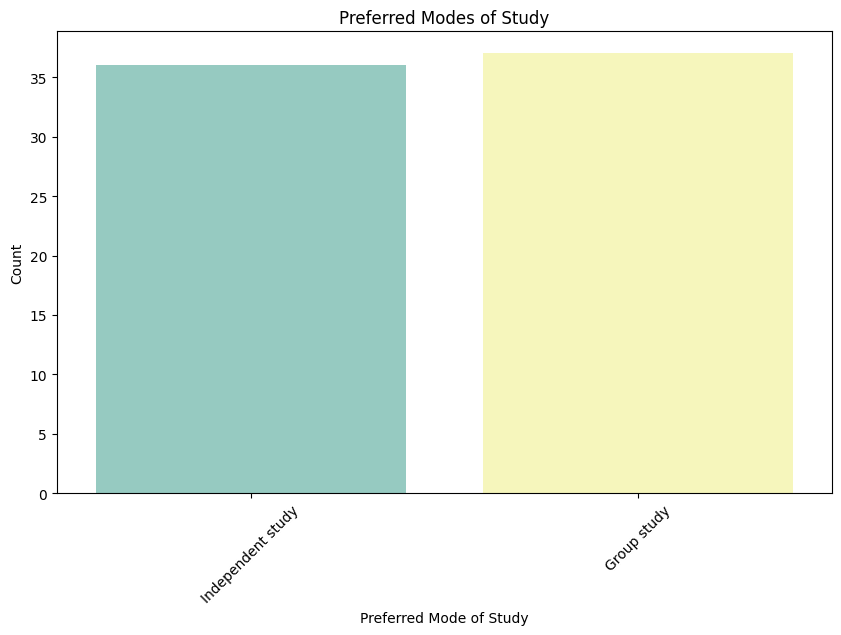

In [57]:
# Create a count plot for the preferred mode of study
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="My preferable mode of study is:", palette='Set3')
plt.xlabel('Preferred Mode of Study')
plt.ylabel('Count')
plt.title('Preferred Modes of Study')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\3213356780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="My preferable time of study is:", palette='Set3')


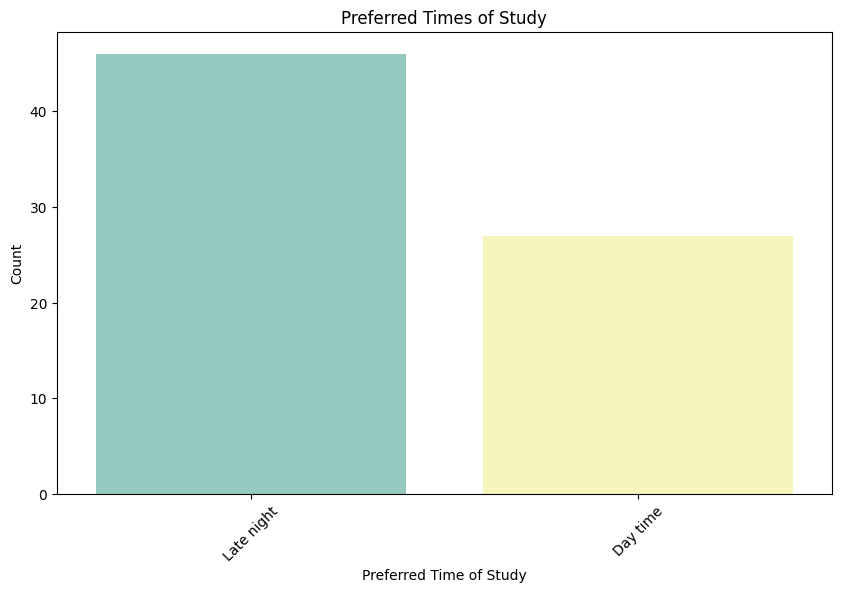

In [58]:
# Create a count plot for the preferred time of study
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="My preferable time of study is:", palette='Set3')
plt.xlabel('Preferred Time of Study')
plt.ylabel('Count')
plt.title('Preferred Times of Study')
plt.xticks(rotation=45)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11628\3841484338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="My overall mobile usage (daily) for non-academic purpose is limited to:", palette='Set3')


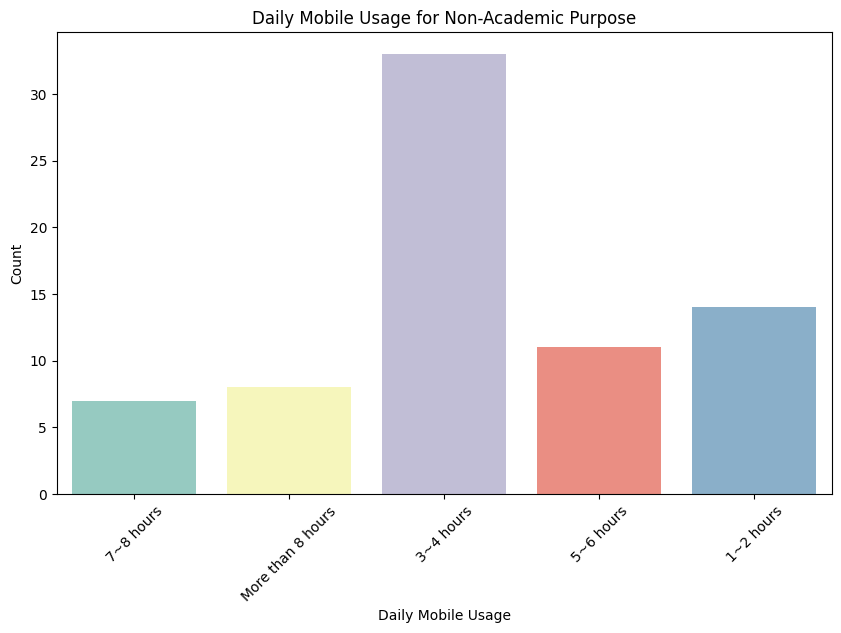

In [59]:
# Create a count plot for daily mobile usage for non-academic purposes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="My overall mobile usage (daily) for non-academic purpose is limited to:", palette='Set3')
plt.xlabel('Daily Mobile Usage')
plt.ylabel('Count')
plt.title('Daily Mobile Usage for Non-Academic Purpose')
plt.xticks(rotation=45)
plt.show()


<H3>
Preprocessing</H3>


<H3>
Step 1: Data Loading</H3>

In [64]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\HP\Downloads\assignment3\Final Data Set.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


ID No.  Program of Study Gender Nationality    Place of Birth  \
0      33  Computer Science   Male   Pakistani            Punjab   
1      32  Computer Science   Male   Pakistani  Federal/ Capital   
2       9  Computer Science   Male   Pakistani  Federal/ Capital   
3      17  Computer Science   Male   Pakistani            Punjab   
4      12  Computer Science   Male   Pakistani            Punjab   

  Father's Education Mother's Education    Parental Income  \
0             Matric             Matric   Between 50K~1Lac   
1       Intermediate                 BS  Between 1Lac~2Lac   
2                 BS       Intermediate   Between 50K~1Lac   
3       Intermediate       Intermediate   Between 50K~1Lac   
4                 MS       Intermediate         Above 3Lac   

  Number of immediate family members  \
0                                  6   
1                                  5   
2                                  5   
3                                  6   
4                                  5   

  Any close family member with the same profession available for guidance  \
0                                                YES                        
1                                                YES                        
2                                                 NO                        
3                                                 NO                        
4                                                 NO                        

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  My overall mobile usage (daily) for non-academic purpose is limited to:  \
0                                          7~8 hours                        
1                                          7~8 hours                        
2                                  More than 8 hours                        
3                                  More than 8 hours                        
4                                  More than 8 hours                        

  Identify any other variable that has negatively impacted on your academic performance.  \
0  Teachers not in good 'Mood' gives marks withou...                                       
1                                   Financial Issues                                       
2                                                NIL                                       
3  not as such everything is covered in the quest...                                       
4                                      Nothing more.                                       

  Unnamed: 76 Unnamed: 77  Unnamed: 78  Unnamed: 79  Unnamed: 80  Unnamed: 81  \
0         NaN         NaN          NaN          NaN          NaN          NaN   
1         NaN         NaN          NaN          NaN          NaN          NaN   
2         NaN         NaN          NaN          NaN          NaN          NaN   
3         NaN         NaN          NaN          NaN          NaN          NaN   
4         NaN         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 82  Unnamed: 83  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 84 columns]

<h3>Step 2: Data Cleaning</h3>

In [66]:
# Dropping columns with too many missing values
threshold = 0.5 * len(data)  # 50% missing values threshold
data_clean = data.dropna(thresh=threshold, axis=1)

# Checking for columns with categorical data
categorical_columns = data_clean.select_dtypes(include=['object']).columns

<h3>Step 3: Handling Null Values in Categorical Columns</h3>

In [67]:
# Handling null values in categorical columns
data_clean_filled = data_clean.fillna('Unknown')


<h3>Step 4: Label Encoding</h3>

In [68]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_clean_filled[column] = label_encoder.fit_transform(data_clean_filled[column])


<h3>Step 5: Standardization</h3>

In [70]:
from sklearn.preprocessing import StandardScaler

# Convert 'Unknown' placeholders to a numeric value (-1)
data_clean_numeric = data_clean_filled.replace('Unknown', -1)

# Identifying features and target variables
target_variables = ['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester']
features = data_clean_numeric.drop(columns=target_variables)

# Standardizing the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Converting the standardized features back to a DataFrame
standardized_features_df = pd.DataFrame(standardized_features, columns=features.columns)

# Reattaching the target variables
preprocessed_data = pd.concat([standardized_features_df, data_clean_numeric[target_variables]], axis=1)


<h3>saving new CSV file</h3>

In [72]:
# Saving the preprocessed data to a new CSV file in the current working directory
output_file_name = 'Preprocessed_Data_Set.csv'
preprocessed_data.to_csv(output_file_name, index=False)

# Output the path for confirmation
print("File saved as:", output_file_name)


File saved as: Preprocessed_Data_Set.csv


<h3>Applying Models(GoTo model.ipynb)</h3>